In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
import linearmodels as plm
from linearmodels.panel import PanelOLS

- 't_pop': total population
- 'med_age': median age
- 'hs_g': only high school degree percent of pop
- 'lhs_g': less than high school degree percent of pop
- 'pop_15': population over 15
- 'med_inc': median income
- 'pop_det_pov': population used to determine poverty
- 'pov_level': under poverty level percent of pop
- 'p_crash: number of crashes involving a pedestrian'

In [ ]:
crash_data12 = pd.read_csv('crash_data12_t.csv')
crash_data13 = pd.read_csv('crash_data13_t.csv')
crash_data14 = pd.read_csv('crash_data14_t.csv')
crash_data15 = pd.read_csv('crash_data15_t.csv')
crash_data16 = pd.read_csv('crash_data16_t.csv')
crash_data17 = pd.read_csv('crash_data17_t.csv')
crash_data18 = pd.read_csv('crash_data18_t.csv')
crash_data19 = pd.read_csv('crash_data19_t.csv')

In [ ]:
# Pivot datasets
data12 = crash_data12.melt(id_vars='index', var_name='City', value_name='2012')
data12 = data12.pivot(index='City', columns='index', values='2012').reset_index()

data13 = crash_data13.melt(id_vars='index', var_name='City', value_name='2013')
data13 = data13.pivot(index='City', columns='index', values='2013').reset_index()

data14 = crash_data14.melt(id_vars='index', var_name='City', value_name='2014')
data14 = data14.pivot(index='City', columns='index', values='2014').reset_index()

data15 = crash_data15.melt(id_vars='index', var_name='City', value_name='2015')
data15 = data15.pivot(index='City', columns='index', values='2015').reset_index()

data16 = crash_data16.melt(id_vars='index', var_name='City', value_name='2016')
data16 = data16.pivot(index='City', columns='index', values='2016').reset_index()

data17 = crash_data17.melt(id_vars='index', var_name='City', value_name='2017')
data17 = data17.pivot(index='City', columns='index', values='2017').reset_index()

data18 = crash_data18.melt(id_vars='index', var_name='City', value_name='2018')
data18 = data18.pivot(index='City', columns='index', values='2018').reset_index()

data19 = crash_data19.melt(id_vars='index', var_name='City', value_name='2019')
data19 = data19.pivot(index='City', columns='index', values='2019').reset_index()

data12.head(20)

index                            City   hs_g  lhs_g  med_age  med_inc  \
0                 agoura hills-malibu  11.90   3.40     43.7  48898.0   
1                            antelope  26.48  21.33     31.5  25748.0   
2                             compton  25.10  33.80     31.1  20777.0   
3                      downey-norwalk  25.90  24.80     33.8  24979.0   
4                           inglewood  24.30  27.40     32.7  23448.0   
5                 long beach-lakewood  19.50  20.10     33.8  26156.0   
6                         los angeles  18.10  26.80     33.9  22172.0   
7      los angeles county, california  20.40  23.60     34.8  25221.0   
8                             newhall  18.50  11.60     35.2  37035.0   
9                        palos verdes  13.20   5.50     45.7  45813.0   
10                           pasadena  12.50  11.60     39.6  37363.0   
11                       san fernando  20.30  20.30     36.3  26225.0   
12                        san gabriel  22.67  23.42     37.0  24644.0   
13                       santa monica   9.80   4.80     40.2  44598.0   
14                   south bay cities  10.00   3.40     39.8  55784.0   
15        south gate-east los angeles  22.70  55.00     28.4  17583.0   
16                           torrance  18.40   6.90     41.7  38137.0   
17                           whittier  26.80  22.80     34.8  26249.0   

index  p_crash     pop_15  pop_det_pov  pov_level      t_pop  
0          7.0    53144.0      61703.0       6.80    64524.0  
1         79.0   298241.0     386353.0      18.74   395545.0  
2         44.0   257129.0     332043.0      19.20   338647.0  
3         67.0   323141.0     409973.0      13.40   414533.0  
4         56.0   285074.0     365759.0      20.10   369012.0  
5        266.0   452665.0     563658.0      18.30   570853.0  
6       2629.0  2051018.0    2455645.0      23.60  2512536.0  
7          NaN  7879663.0    9684503.0      17.10  9840024.0  
8         26.0   198485.0     244332.0       8.00   254201.0  
9          1.0    74447.0      91188.0       5.60    91682.0  
10        82.0   224806.0     267122.0       9.90   270209.0  
11       153.0  1440363.0    1761529.0      15.00  1776852.0  
12       365.0  1280989.0    1561732.0      13.07  1587221.0  
13       104.0    79642.0      89211.0      11.30    90008.0  
14       203.0   114190.0     137943.0       4.60   138239.0  
15        41.0   370903.0     497589.0      25.80   500506.0  
16        39.0   120334.0     144206.0       7.40   145443.0  
17        24.0   255092.0     314517.0      10.30   320013.0

In [ ]:
data12['Year'] = 2012
data13['Year'] = 2013
data14['Year'] = 2014
data15['Year'] = 2015
data16['Year'] = 2016
data17['Year'] = 2017
data18['Year'] = 2018
data19['Year'] = 2019

In [ ]:
data12.head()

index                 City   hs_g  lhs_g  med_age  med_inc  p_crash    pop_15  \
0      agoura hills-malibu  11.90   3.40     43.7  48898.0      7.0   53144.0   
1                 antelope  26.48  21.33     31.5  25748.0     79.0  298241.0   
2                  compton  25.10  33.80     31.1  20777.0     44.0  257129.0   
3           downey-norwalk  25.90  24.80     33.8  24979.0     67.0  323141.0   
4                inglewood  24.30  27.40     32.7  23448.0     56.0  285074.0   

index  pop_det_pov  pov_level     t_pop  Year  
0          61703.0       6.80   64524.0  2012  
1         386353.0      18.74  395545.0  2012  
2         332043.0      19.20  338647.0  2012  
3         409973.0      13.40  414533.0  2012  
4         365759.0      20.10  369012.0  2012

In [ ]:
combined_data = pd.concat([data12, data13, data14, data15, data16, data17, data18, data19])
combined_data.head()

index                 City   hs_g  lhs_g  med_age  med_inc  p_crash    pop_15  \
0      agoura hills-malibu  11.90   3.40     43.7  48898.0      7.0   53144.0   
1                 antelope  26.48  21.33     31.5  25748.0     79.0  298241.0   
2                  compton  25.10  33.80     31.1  20777.0     44.0  257129.0   
3           downey-norwalk  25.90  24.80     33.8  24979.0     67.0  323141.0   
4                inglewood  24.30  27.40     32.7  23448.0     56.0  285074.0   

index  pop_det_pov  pov_level     t_pop  Year  
0          61703.0       6.80   64524.0  2012  
1         386353.0      18.74  395545.0  2012  
2         332043.0      19.20  338647.0  2012  
3         409973.0      13.40  414533.0  2012  
4         365759.0      20.10  369012.0  2012

In [ ]:
combined_data = combined_data.set_index(['City', 'Year'], drop = False)
combined_data.head()

index                                    City   hs_g  lhs_g  med_age  med_inc  \
City                Year                                                        
agoura hills-malibu 2012  agoura hills-malibu  11.90   3.40     43.7  48898.0   
antelope            2012             antelope  26.48  21.33     31.5  25748.0   
compton             2012              compton  25.10  33.80     31.1  20777.0   
downey-norwalk      2012       downey-norwalk  25.90  24.80     33.8  24979.0   
inglewood           2012            inglewood  24.30  27.40     32.7  23448.0   

index                     p_crash    pop_15  pop_det_pov  pov_level     t_pop  \
City                Year                                                        
agoura hills-malibu 2012      7.0   53144.0      61703.0       6.80   64524.0   
antelope            2012     79.0  298241.0     386353.0      18.74  395545.0   
compton             2012     44.0  257129.0     332043.0      19.20  338647.0   
downey-norwalk      2012     67.0  323141.0     409973.0      13.40  414533.0   
inglewood           2012     56.0  285074.0     365759.0      20.10  369012.0   

index                     Year  
City                Year        
agoura hills-malibu 2012  2012  
antelope            2012  2012  
compton             2012  2012  
downey-norwalk      2012  2012  
inglewood           2012  2012

In [ ]:
combined_data.sort_index(inplace=True)
combined_data.head(60)

index                                                          City   hs_g  \
City                           Year                                          
agoura hills-malibu            2012             agoura hills-malibu  11.90   
                               2013             agoura hills-malibu  11.80   
                               2014             agoura hills-malibu  12.60   
                               2015             agoura hills-malibu  12.60   
                               2016             agoura hills-malibu  11.50   
                               2017             agoura hills-malibu  11.30   
                               2018             agoura hills-malibu  11.70   
                               2019             agoura hills-malibu  10.40   
antelope                       2012                        antelope  26.48   
                               2013                        antelope  26.33   
                               2014                        antelope  26.70   
                               2015                        antelope  27.45   
                               2016                        antelope  26.84   
                               2017                        antelope  27.50   
                               2018                        antelope  27.45   
                               2019                        antelope  27.22   
compton                        2012                         compton  25.10   
                               2013                         compton  25.10   
                               2014                         compton  25.00   
                               2015                         compton  24.80   
                               2016                         compton  25.20   
                               2017                         compton  25.40   
                               2018                         compton  25.80   
                               2019                         compton  25.80   
downey-norwalk                 2012                  downey-norwalk  25.90   
                               2013                  downey-norwalk  25.80   
                               2014                  downey-norwalk  25.70   
                               2015                  downey-norwalk  24.90   
                               2016                  downey-norwalk  24.60   
                               2017                  downey-norwalk  24.60   
                               2018                  downey-norwalk  24.70   
                               2019                  downey-norwalk  24.50   
inglewood                      2012                       inglewood  24.30   
                               2013                       inglewood  24.10   
                               2014                       inglewood  24.00   
                               2015                       inglewood  24.10   
                               2016                       inglewood  24.30   
                               2017                       inglewood  24.30   
                               2018                       inglewood  24.10   
                               2019                       inglewood  24.20   
long beach-lakewood            2012             long beach-lakewood  19.50   
                               2013             long beach-lakewood  19.50   
                               2014             long beach-lakewood  19.10   
                               2015             long beach-lakewood  19.50   
                               2016             long beach-lakewood  19.30   
                               2017             long beach-lakewood  19.40   
                               2018             long beach-lakewood  18.90   
                               2019             long beach-lakewood  18.80   
los angeles                    2012                     los angeles  18.10   
                      

In [ ]:
combined_data = combined_data[combined_data['City'] != "los angeles county, california"]

In [ ]:
combined_data.head(60)

index                                    City   hs_g  lhs_g  med_age  med_inc  \
City                Year                                                        
agoura hills-malibu 2012  agoura hills-malibu  11.90   3.40     43.7  48898.0   
                    2013  agoura hills-malibu  11.80   3.30     43.9  47875.0   
                    2014  agoura hills-malibu  12.60   3.50     43.9  46353.0   
                    2015  agoura hills-malibu  12.60   3.40     44.8  45332.0   
                    2016  agoura hills-malibu  11.50   3.40     45.3  47283.0   
                    2017  agoura hills-malibu  11.30   3.00     45.0  48564.0   
                    2018  agoura hills-malibu  11.70   2.60     45.1  51970.0   
                    2019  agoura hills-malibu  10.40   2.50     45.5  52449.0   
antelope            2012             antelope  26.48  21.33     31.5  25748.0   
                    2013             antelope  26.33  21.53     32.0  25444.0   
                    2014             antelope  26.70  21.39     32.0  25686.0   
                    2015             antelope  27.45  20.83     32.5  25916.5   
                    2016             antelope  26.84  20.78     32.5  26731.5   
                    2017             antelope  27.50  20.36     33.0  27955.0   
                    2018             antelope  27.45  21.03     33.0  28860.5   
                    2019             antelope  27.22  20.31     33.5  30753.5   
compton             2012              compton  25.10  33.80     31.1  20777.0   
                    2013              compton  25.10  33.70     31.3  20411.0   
                    2014              compton  25.00  33.70     31.7  20098.0   
                    2015              compton  24.80  33.70     32.0  20545.0   
                    2016              compton  25.20  33.30     32.3  21226.0   
                    2017              compton  25.40  33.20     32.7  22163.0   
                    2018              compton  25.80  32.70     33.1  23818.0   
                    2019              compton  25.80  32.10     33.6  25319.0   
downey-norwalk      2012       downey-norwalk  25.90  24.80     33.8  24979.0   
                    2013       downey-norwalk  25.80  24.10     34.0  24932.0   
                    2014       downey-norwalk  25.70  24.30     34.5  25135.0   
                    2015       downey-norwalk  24.90  24.30     34.5  25318.0   
                    2016       downey-norwalk  24.60  23.80     35.1  25847.0   
                    2017       downey-norwalk  24.60  23.30     35.4  26702.0   
                    2018       downey-norwalk  24.70  22.80     35.8  27706.0   
                    2019       downey-norwalk  24.50  21.60     35.8  29492.0   
inglewood           2012            inglewood  24.30  27.40     32.7  23448.0   
                    2013            inglewood  24.10  27.60     32.6  22633.0   
                    2014            inglewood  24.00  27.50     33.0  22428.0   
                    2015            inglewood  24.10  26.90     33.6  22143.0   
                    2016            inglewood  24.30  26.20     34.0  22470.0   
                    2017            inglewood  24.30  25.40     34.5  23356.0   
                    2018            inglewood  24.10  24.70     35.0  25119.0   
                    2019            inglewood  24.20  24.50     35.2  26532.0   
long beach-lakewood 2012  long beach-lakewood  19.50  20.10     33.8  26156.0   
                    2013  long beach-lakewood  19.50  19.90     34.4  26328.0   
                    2014  long beach-lakewood  19.10  20.00     34.5  26554.0   
                    2015  long beach-lakewood  19.50  19.70     34.7  26805.0   
                    2016  long beach-lakewood  19.30  19.40     34.7  27338.0   
                    2017  long beach-lakewood  19.40  18.90     34.8  29438.0   
                    2018  long beach-lakewood  18.90  18.70     35.1  30587.0   
                    2019  long 

In [ ]:
combined_data.to_csv('combined_data.csv')

In [ ]:
combined_data.describe()

index        hs_g       lhs_g     med_age       med_inc      p_crash  \
count  136.000000  136.000000  136.000000    136.000000   136.000000   
mean    19.122353   18.058235   37.317647  33561.669118   266.448529   
std      5.945928   12.522326    4.519946  11809.030977   682.004288   
min      8.300000    2.500000   28.400000  17119.000000     0.000000   
25%     12.975000    6.200000   34.250000  24973.000000    39.000000   
50%     19.350000   19.700000   36.550000  27855.500000    70.000000   
75%     24.300000   23.875000   40.400000  43074.000000   146.250000   
max     28.900000   55.000000   48.500000  67373.000000  3215.000000   

index        pop_15   pop_det_pov   pov_level         t_pop         Year  
count  1.360000e+02  1.360000e+02  136.000000  1.360000e+02   136.000000  
mean   4.771308e+05  5.799004e+05   13.698309  5.888867e+05  2015.500000  
std    5.709798e+05  6.802498e+05    6.148049  6.925678e+05     2.299758  
min    5.314400e+04  6.170300e+04    4.100000  6.452400e+04  2012.000000  
25%    1.209288e+05  1.449815e+05    8.150000  1.460132e+05  2013.750000  
50%    2.707635e+05  3.433210e+05   12.585000  3.483535e+05  2015.500000  
75%    3.811875e+05  5.005968e+05   18.925000  5.032285e+05  2017.250000  
max    2.165224e+06  2.546643e+06   27.300000  2.603620e+06  2019.000000

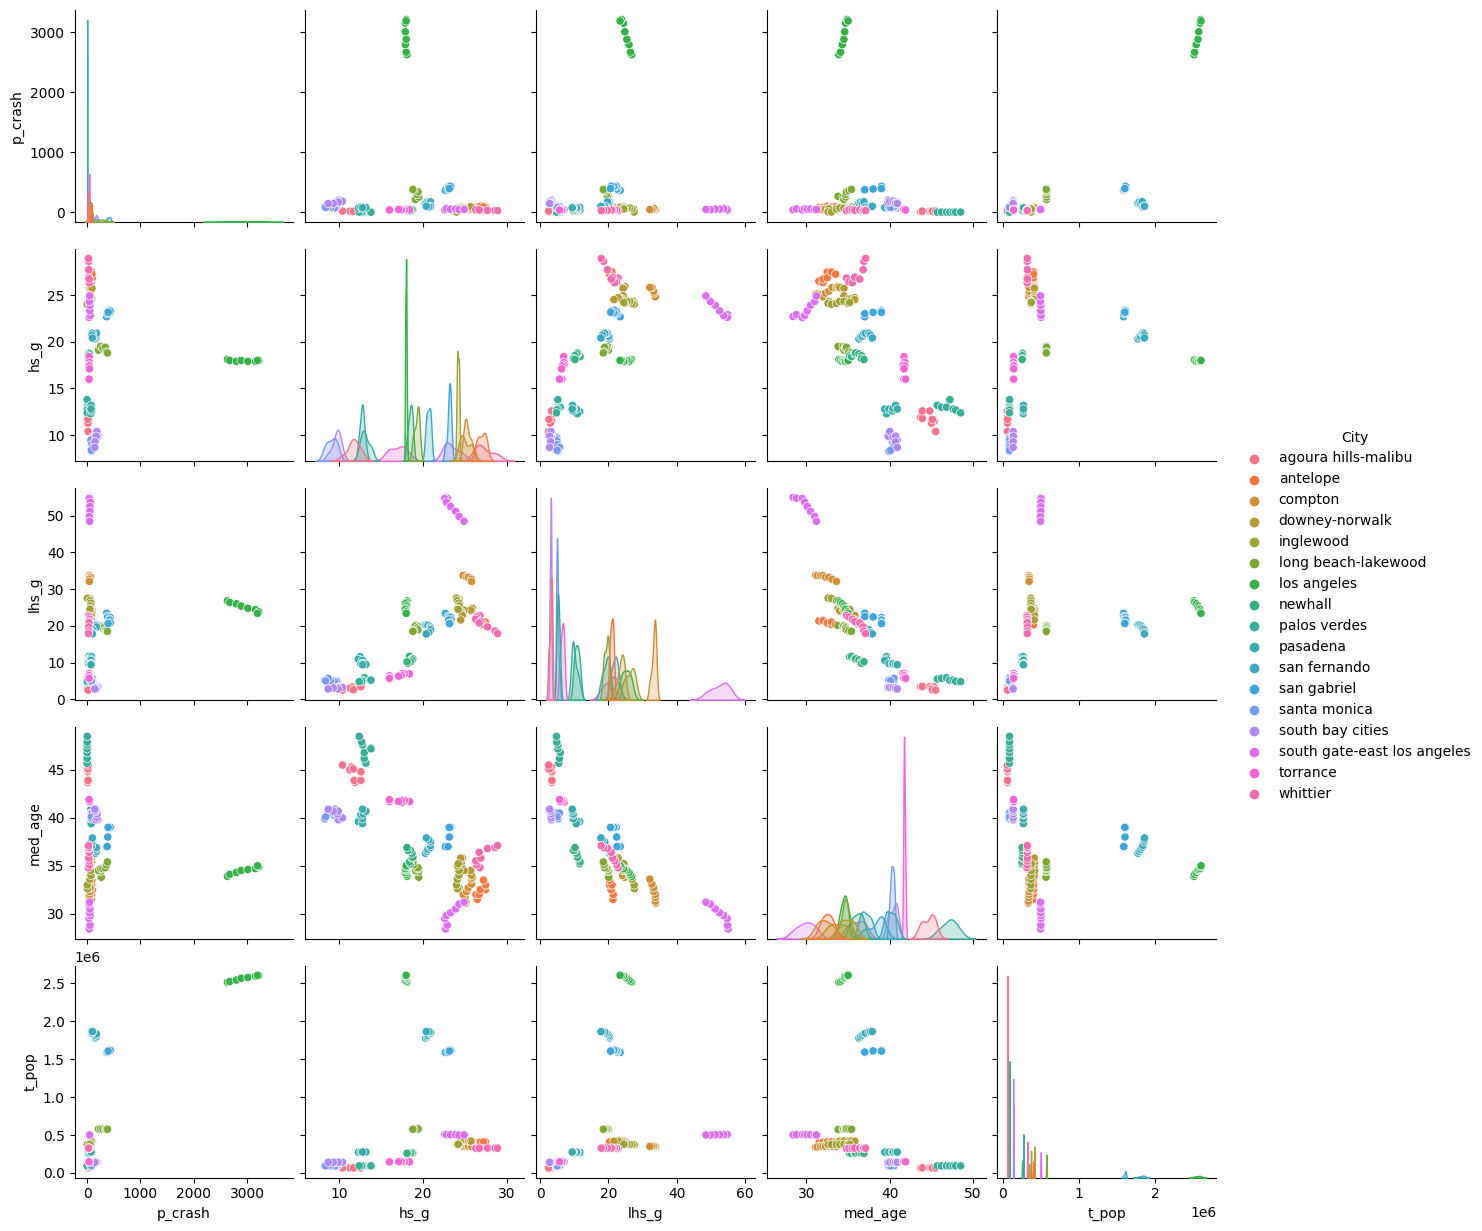

In [ ]:
sns.pairplot(combined_data, vars = ['p_crash', 'hs_g', 'lhs_g', 'med_age', 't_pop'], hue = 'City')

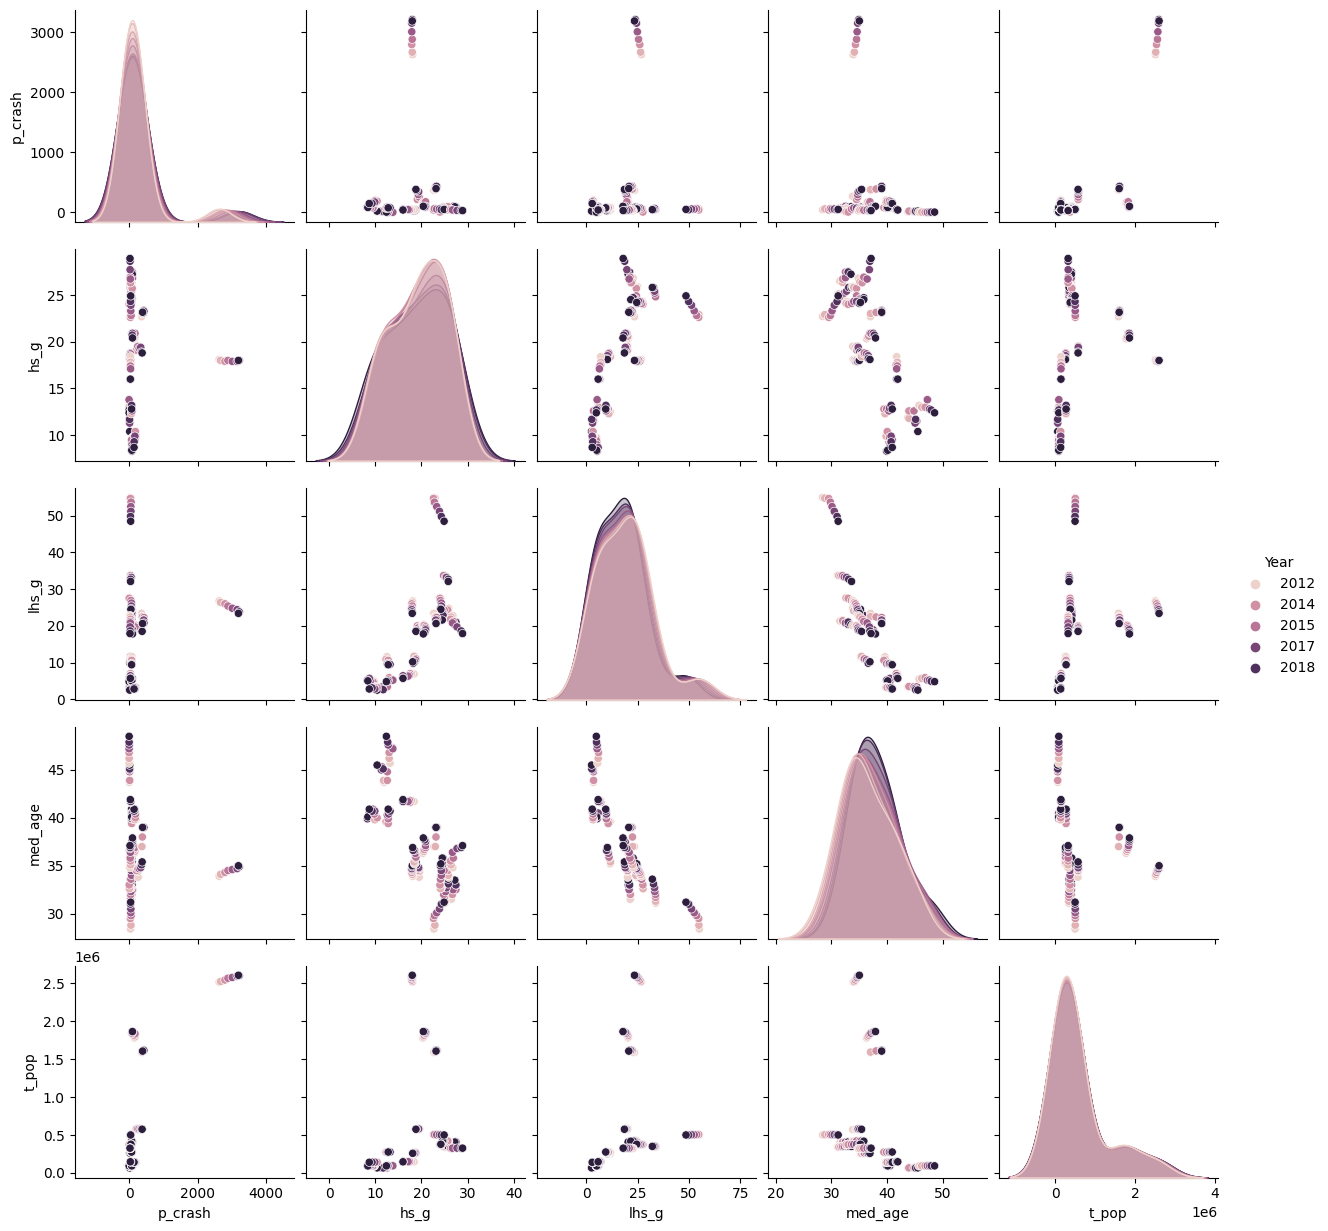

In [ ]:
sns.pairplot(combined_data, vars = ['p_crash', 'hs_g', 'lhs_g', 'med_age', 't_pop'], hue = 'Year')

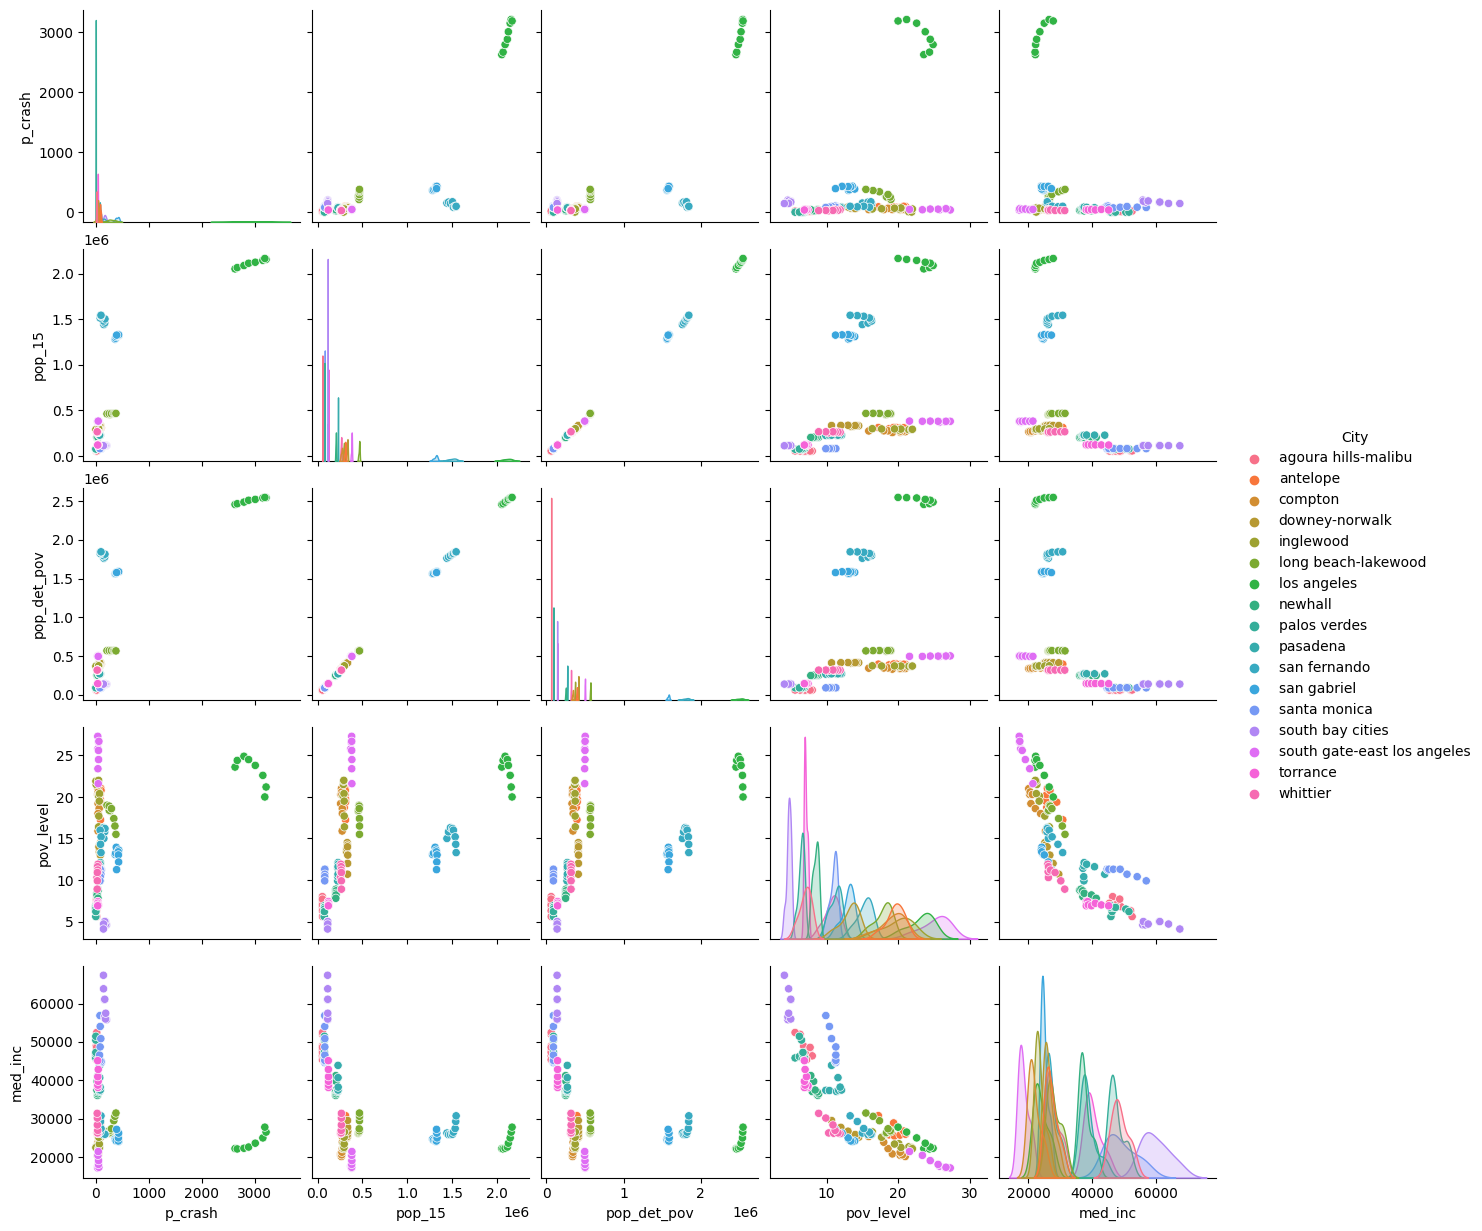

In [ ]:
sns.pairplot(combined_data, vars = ['p_crash', 'pop_15', 'pop_det_pov', 'pov_level', 'med_inc'], hue = 'City')

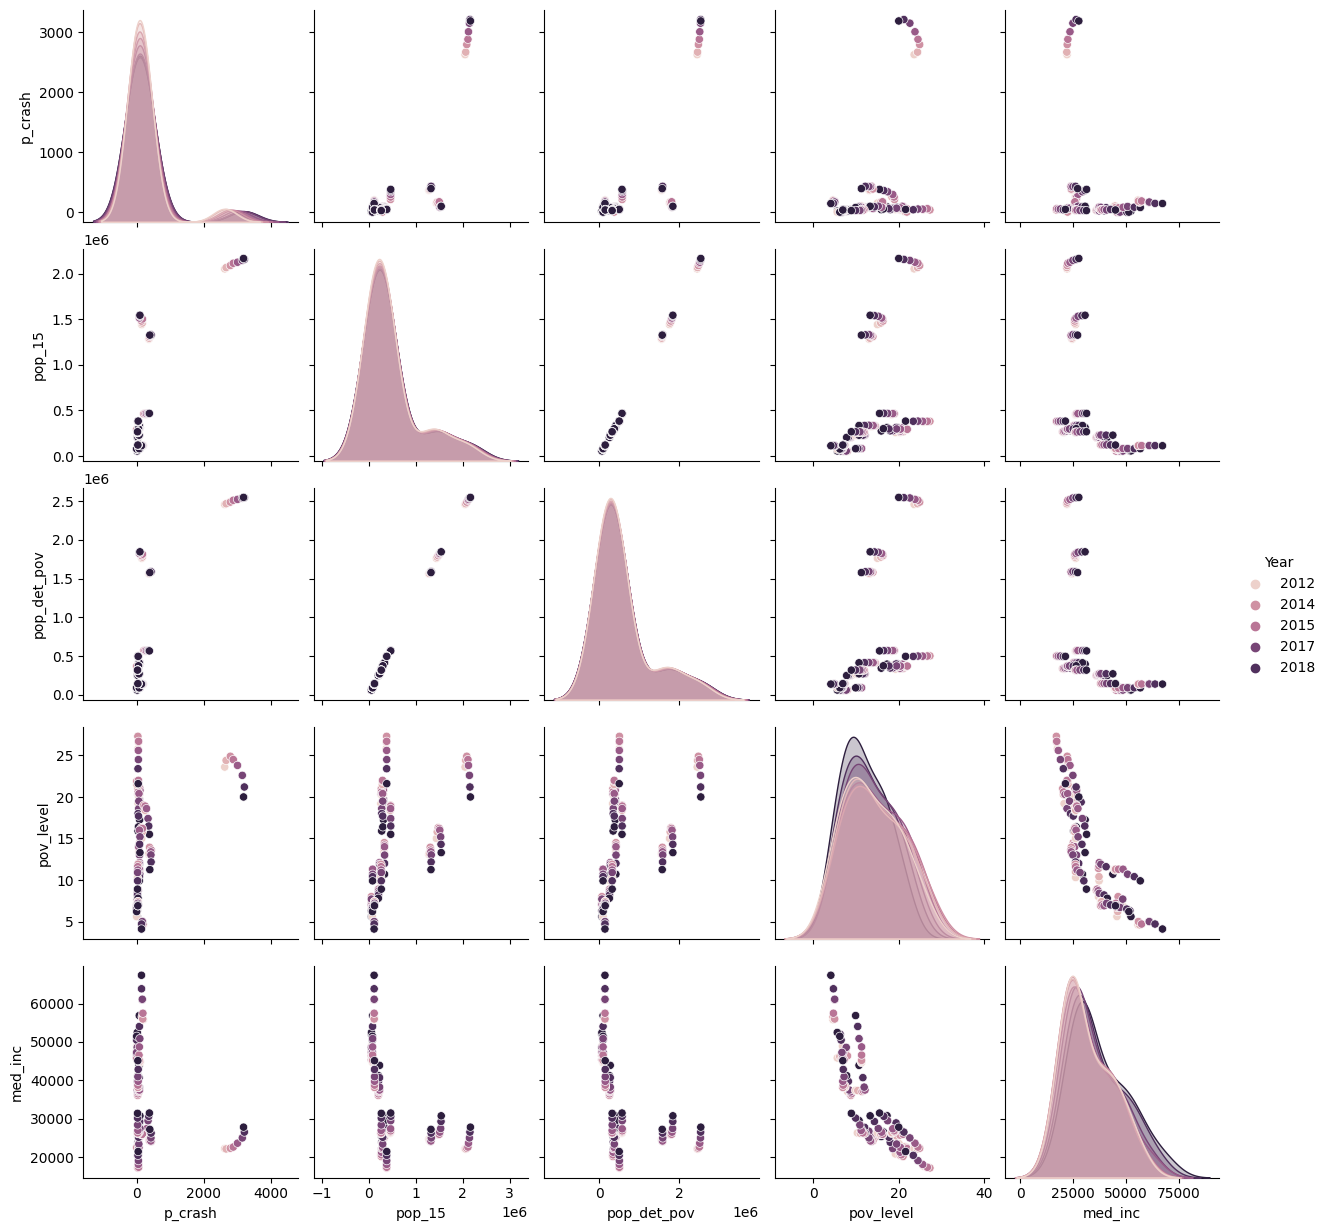

In [ ]:
sns.pairplot(combined_data, vars = ['p_crash', 'pop_15', 'pop_det_pov', 'pov_level', 'med_inc'], hue = 'Year')

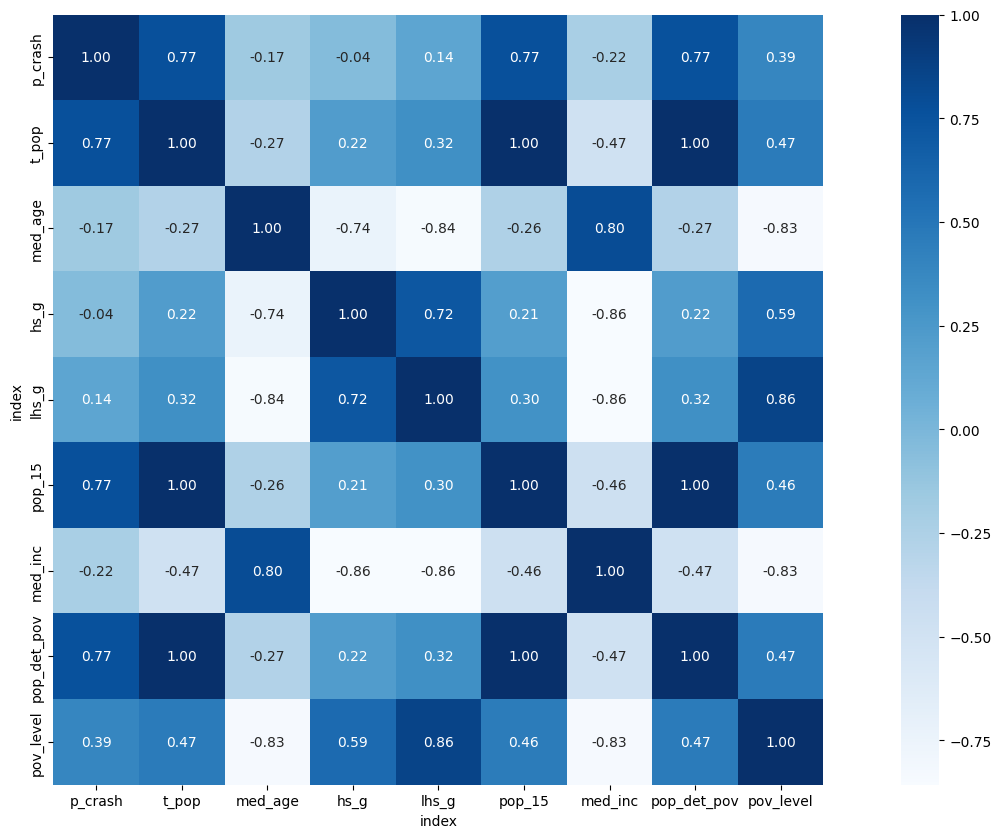

In [ ]:
plt.figure(figsize=(20,10))
c= combined_data[['p_crash', 't_pop', 'med_age', 'hs_g', 'lhs_g', 'pop_15', 'med_inc', 'pop_det_pov', 'pov_level']].corr()
sns.heatmap(c,cmap="Blues",annot=True,square = True,fmt='.2f')
plt.show()

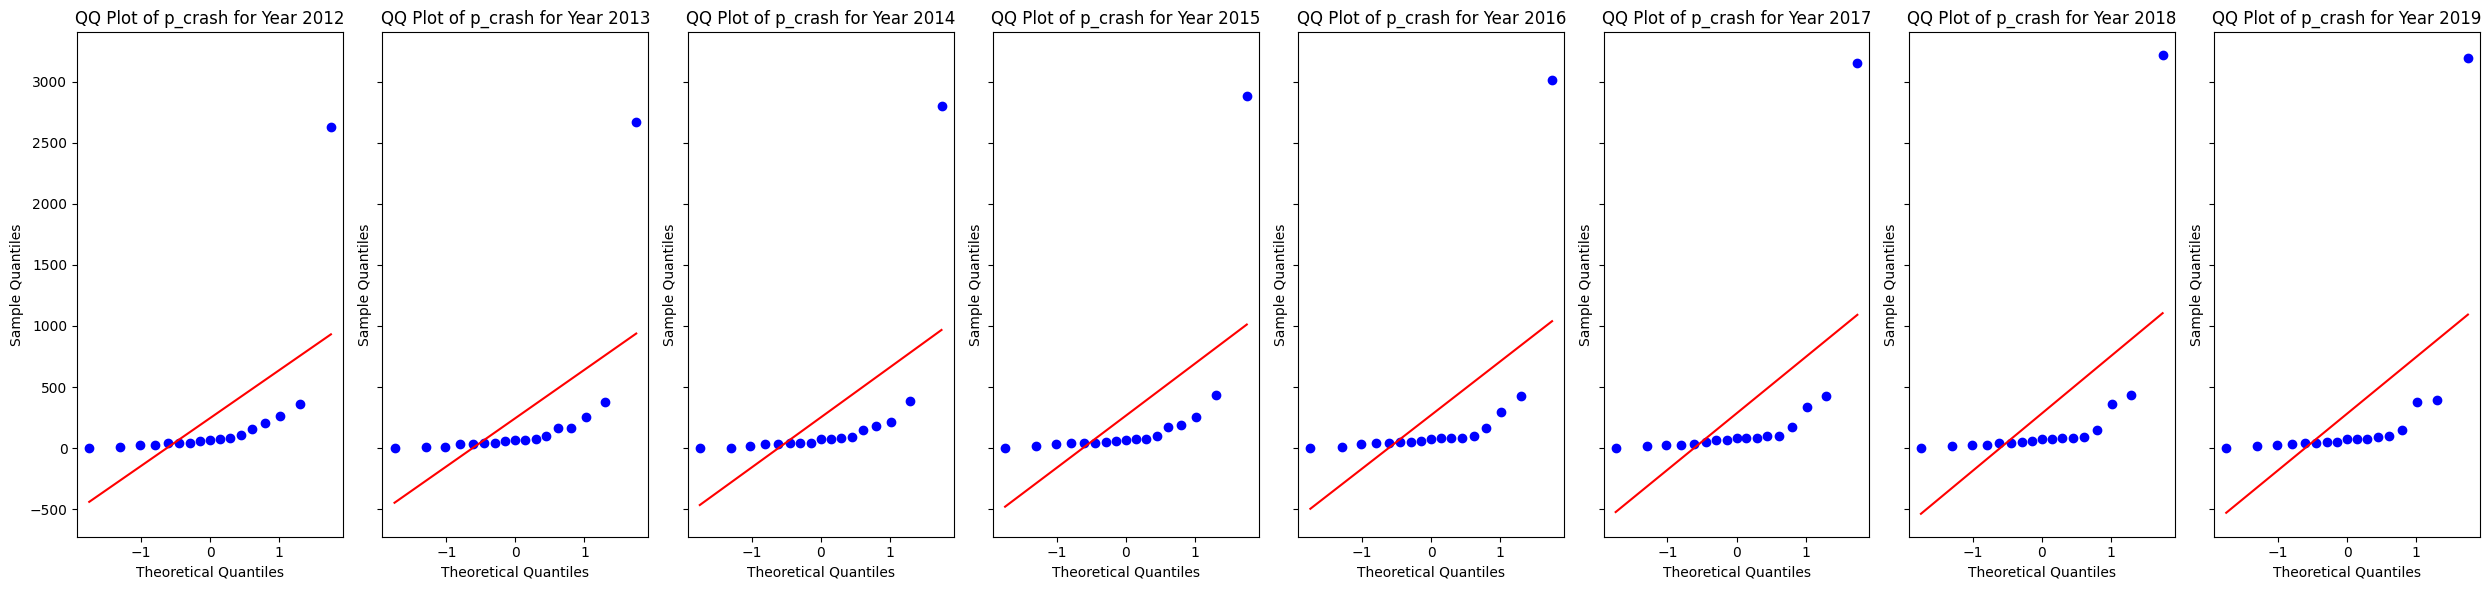

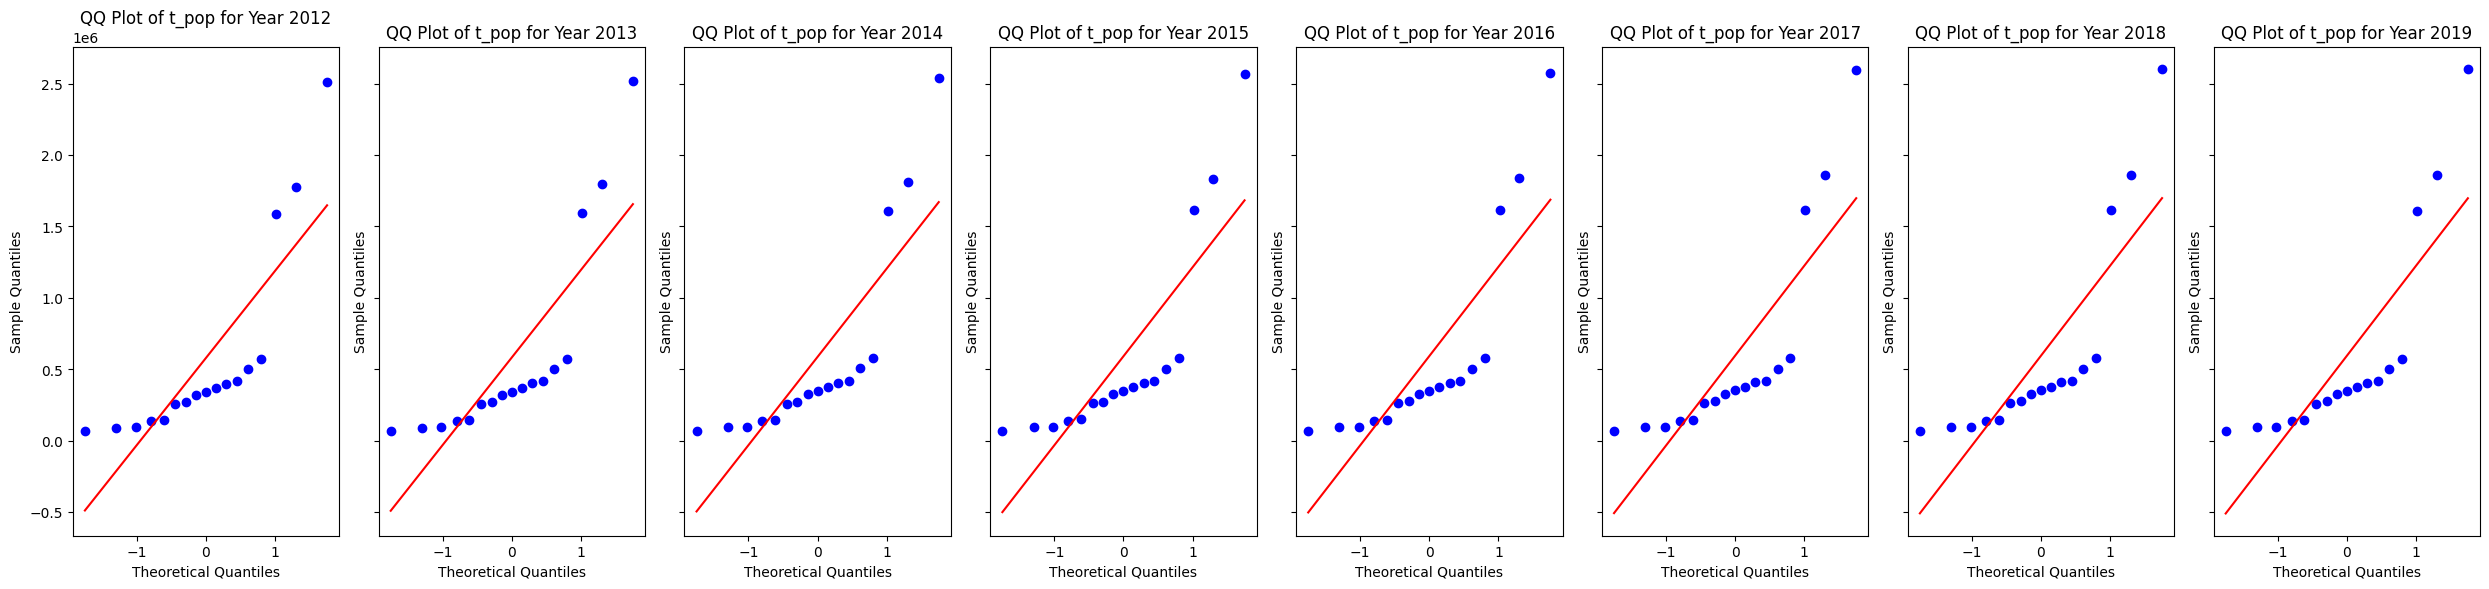

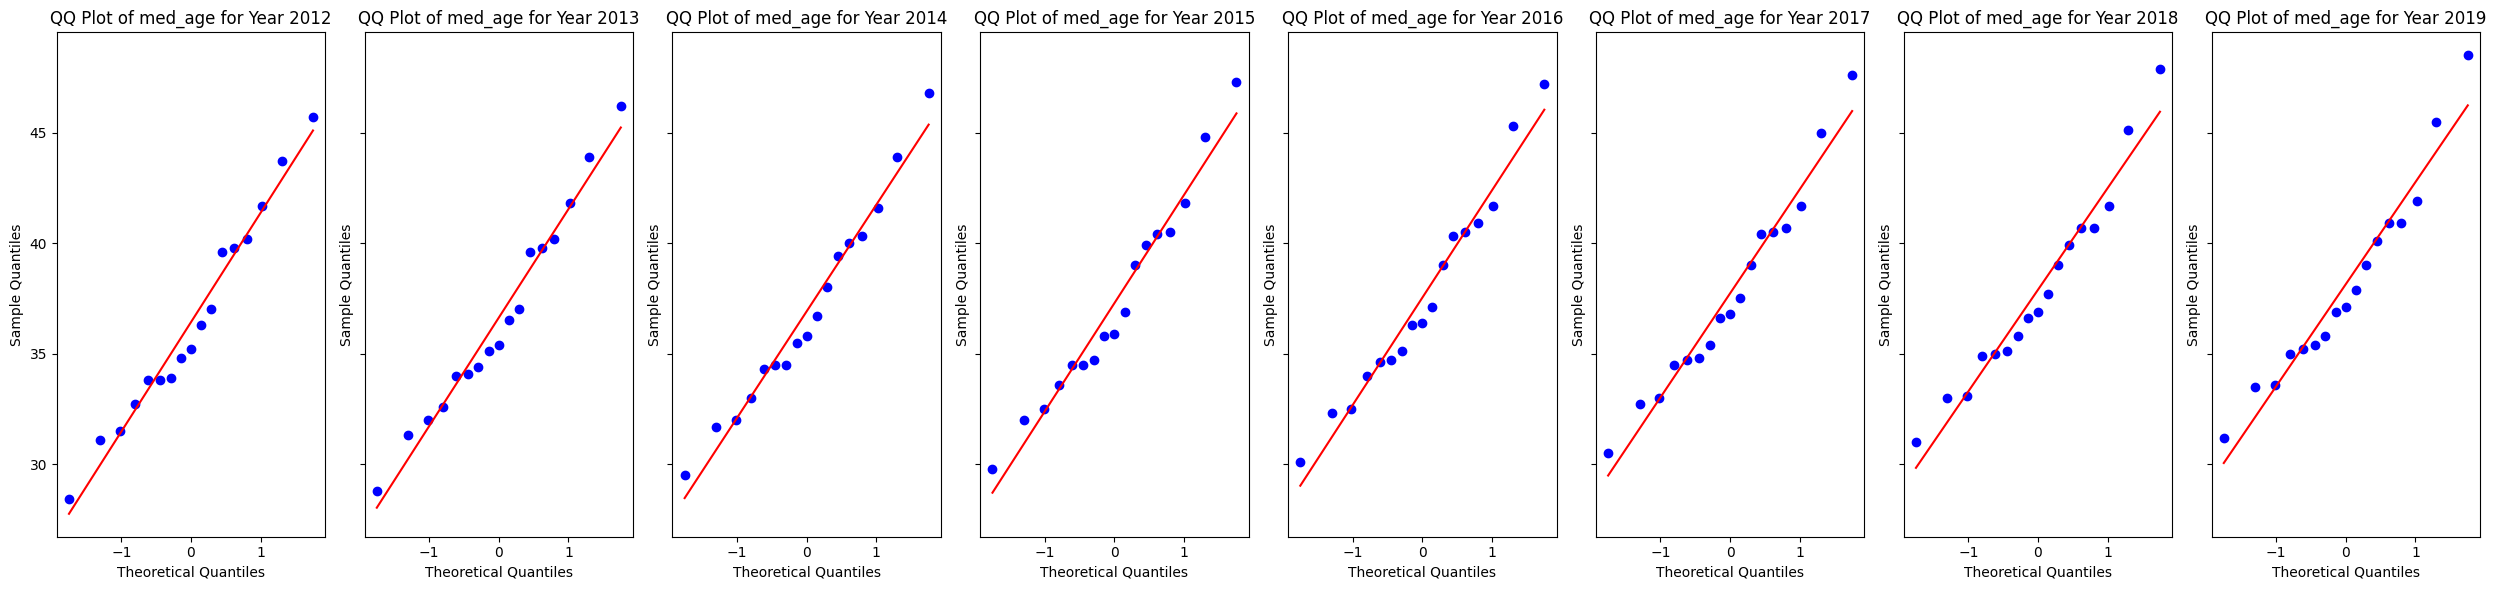

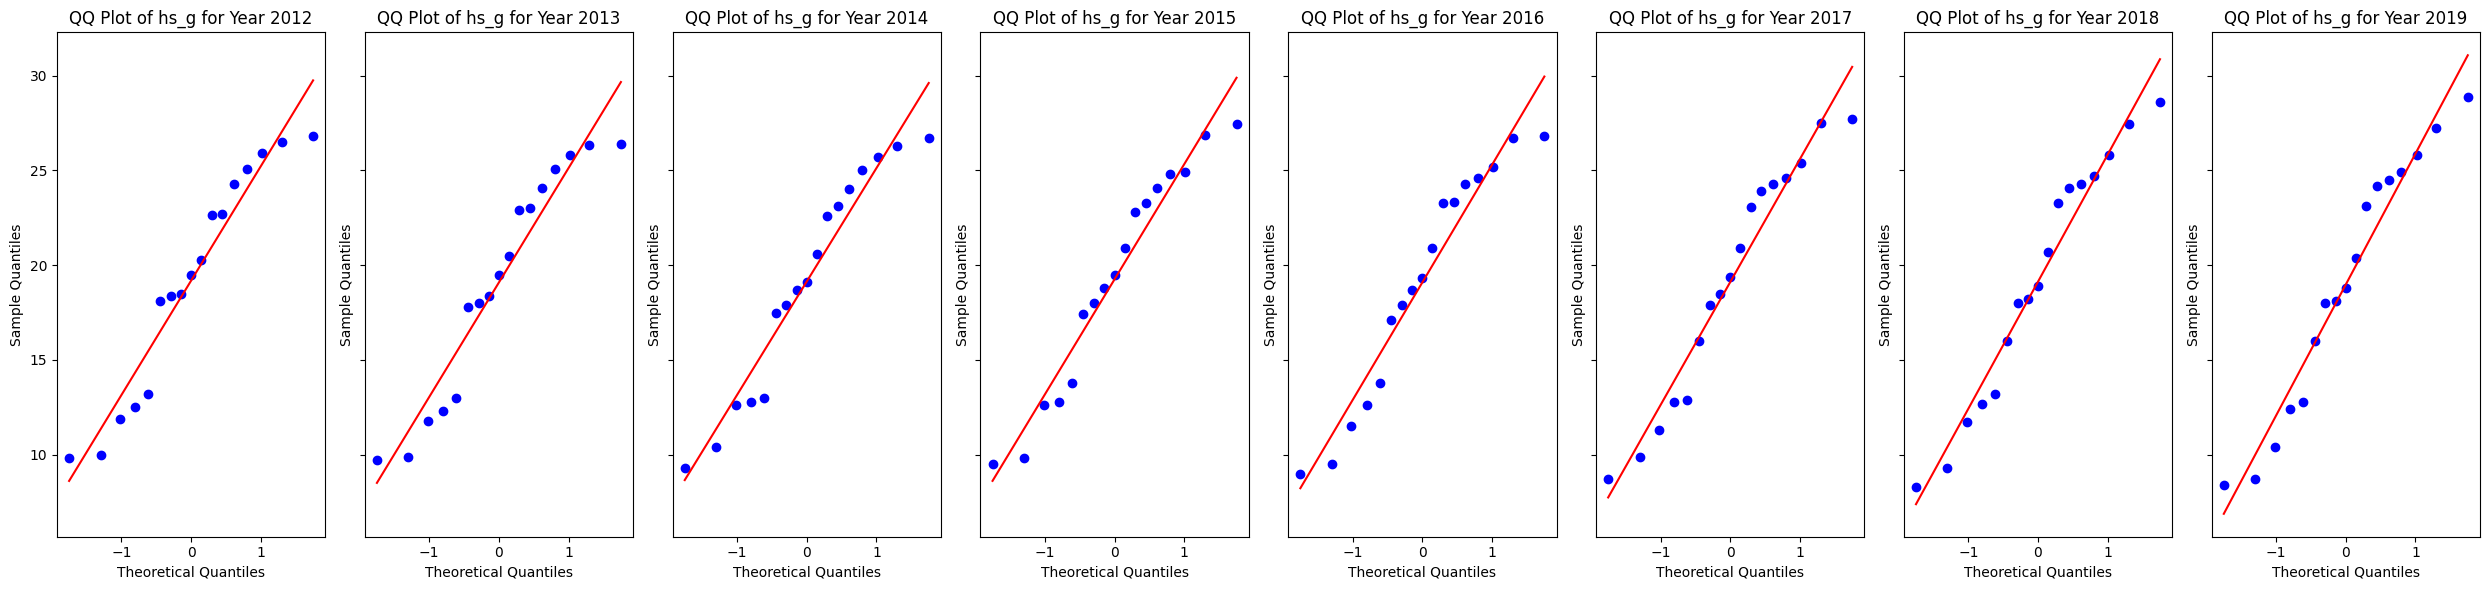

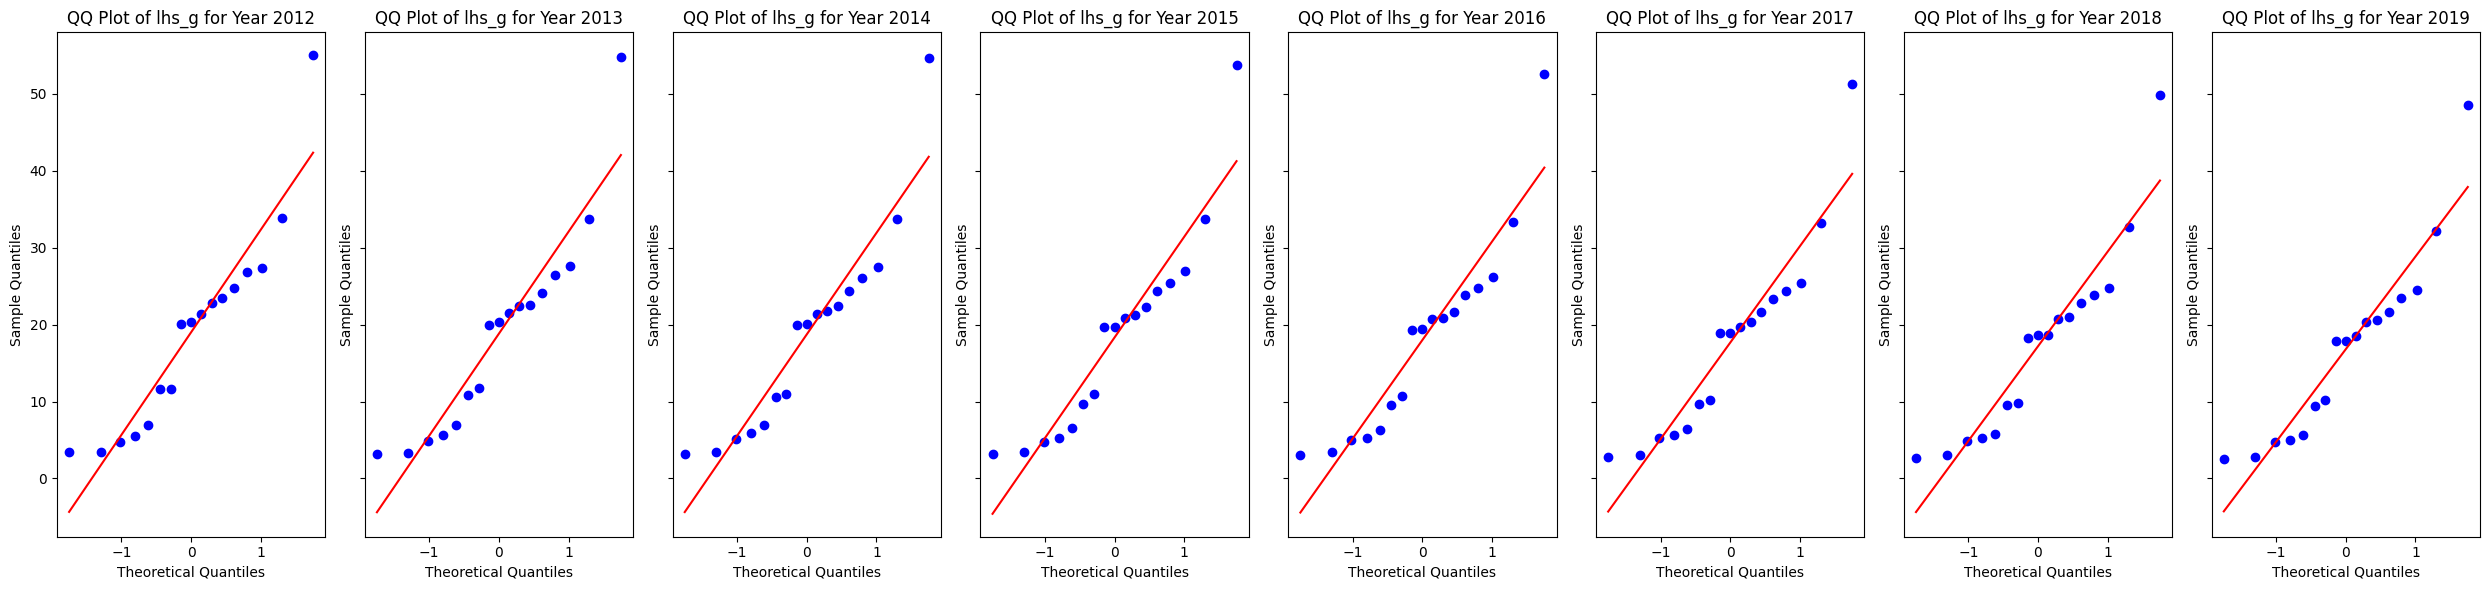

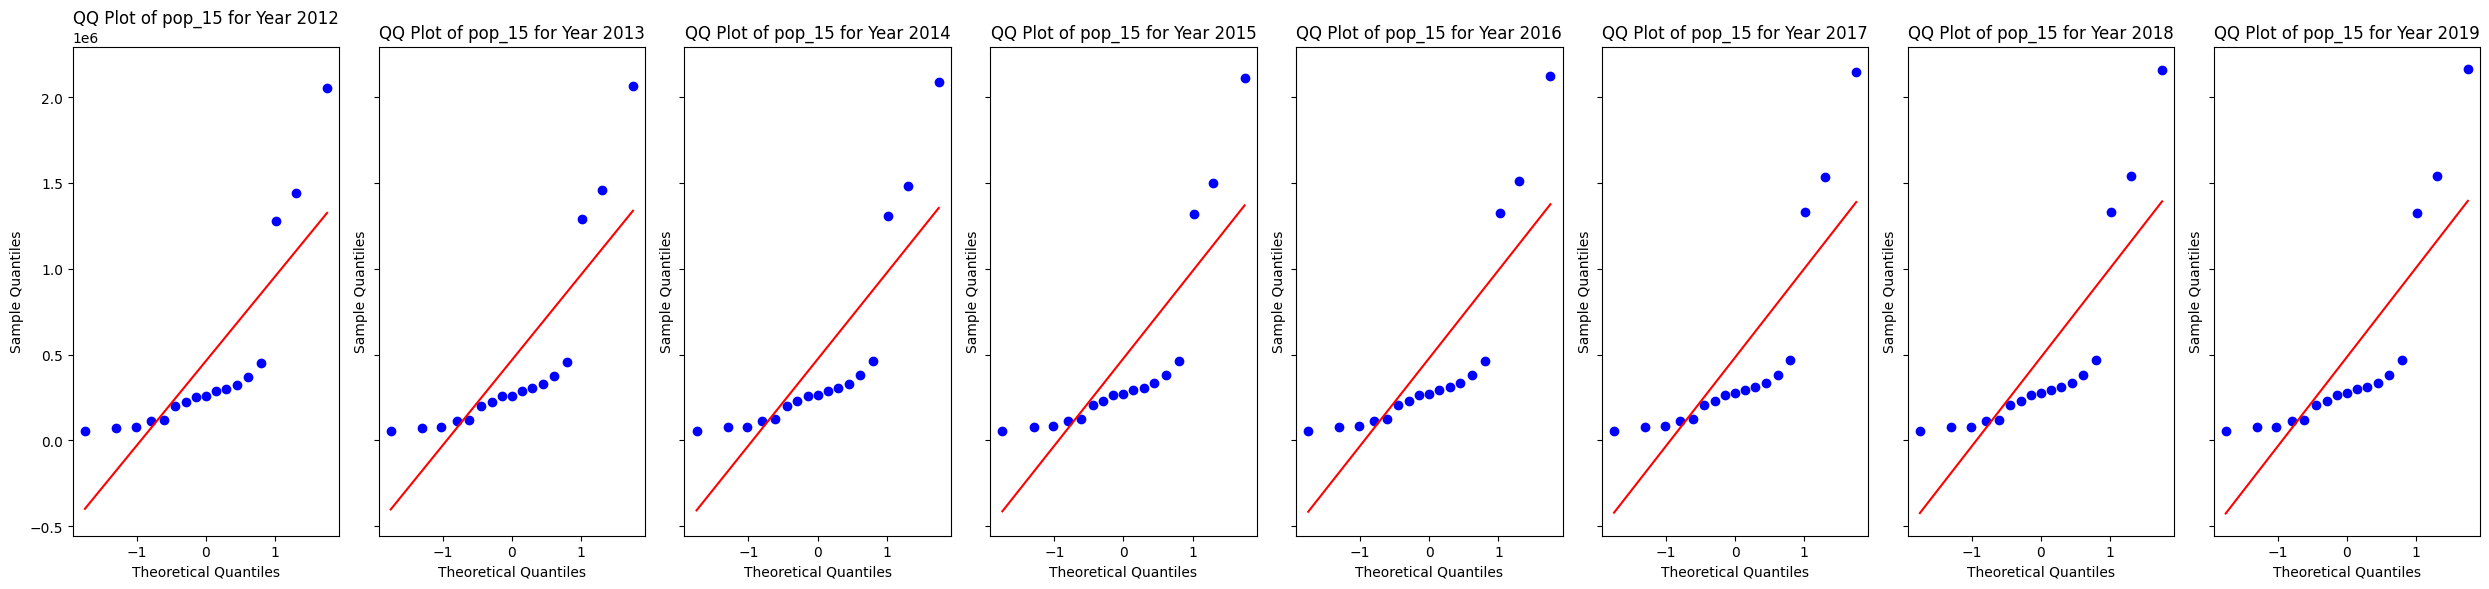

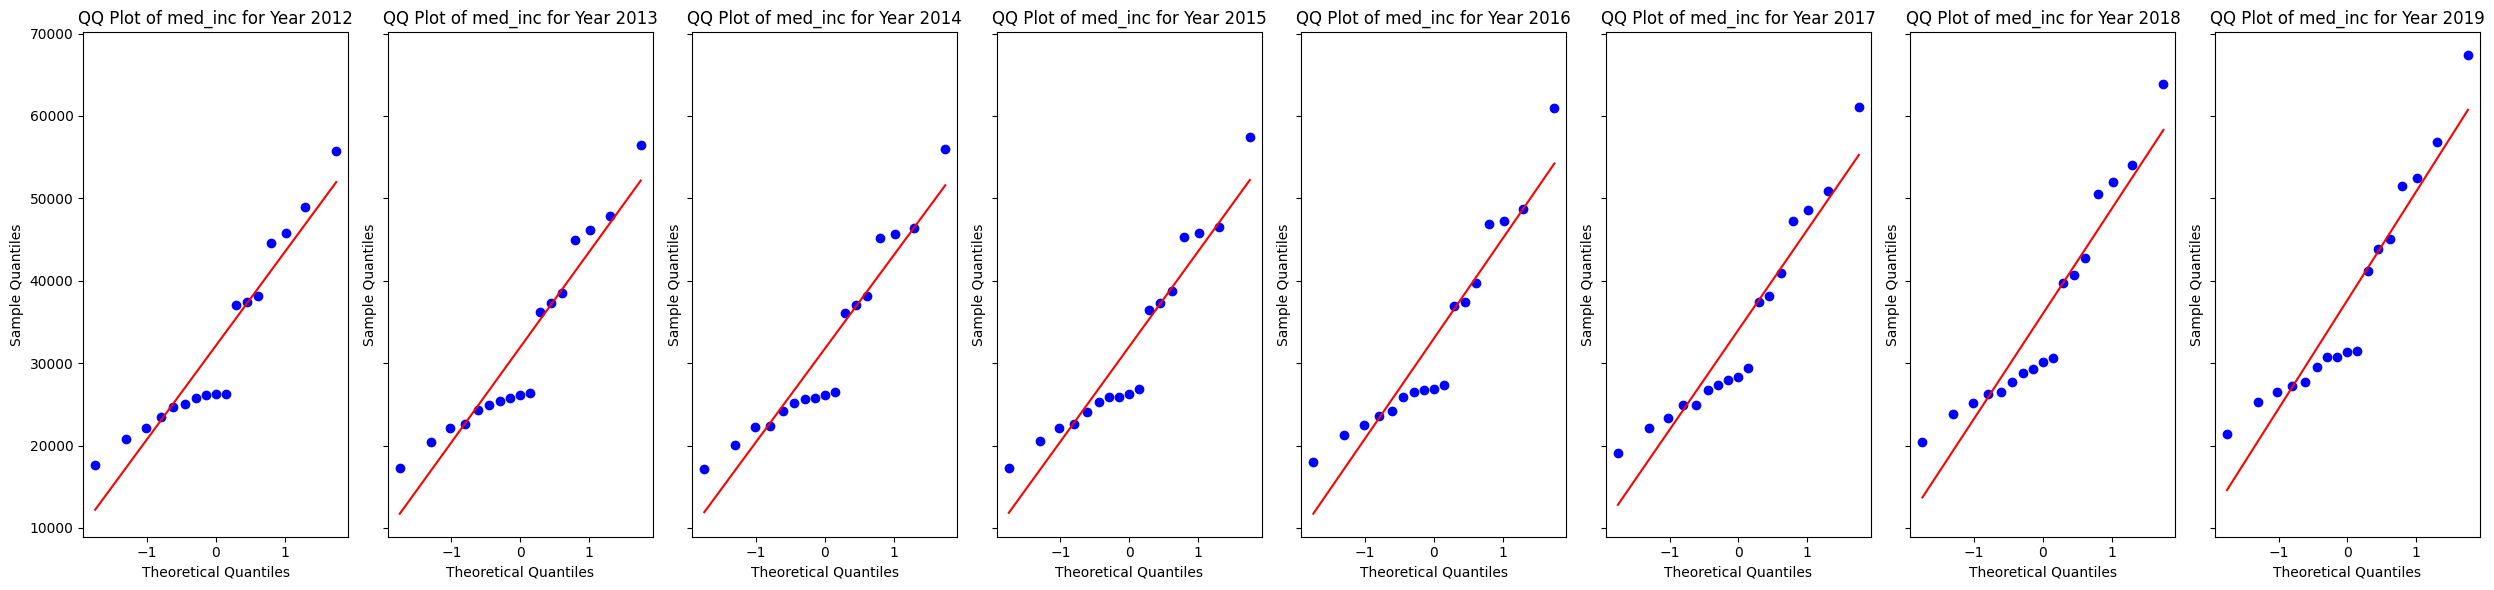

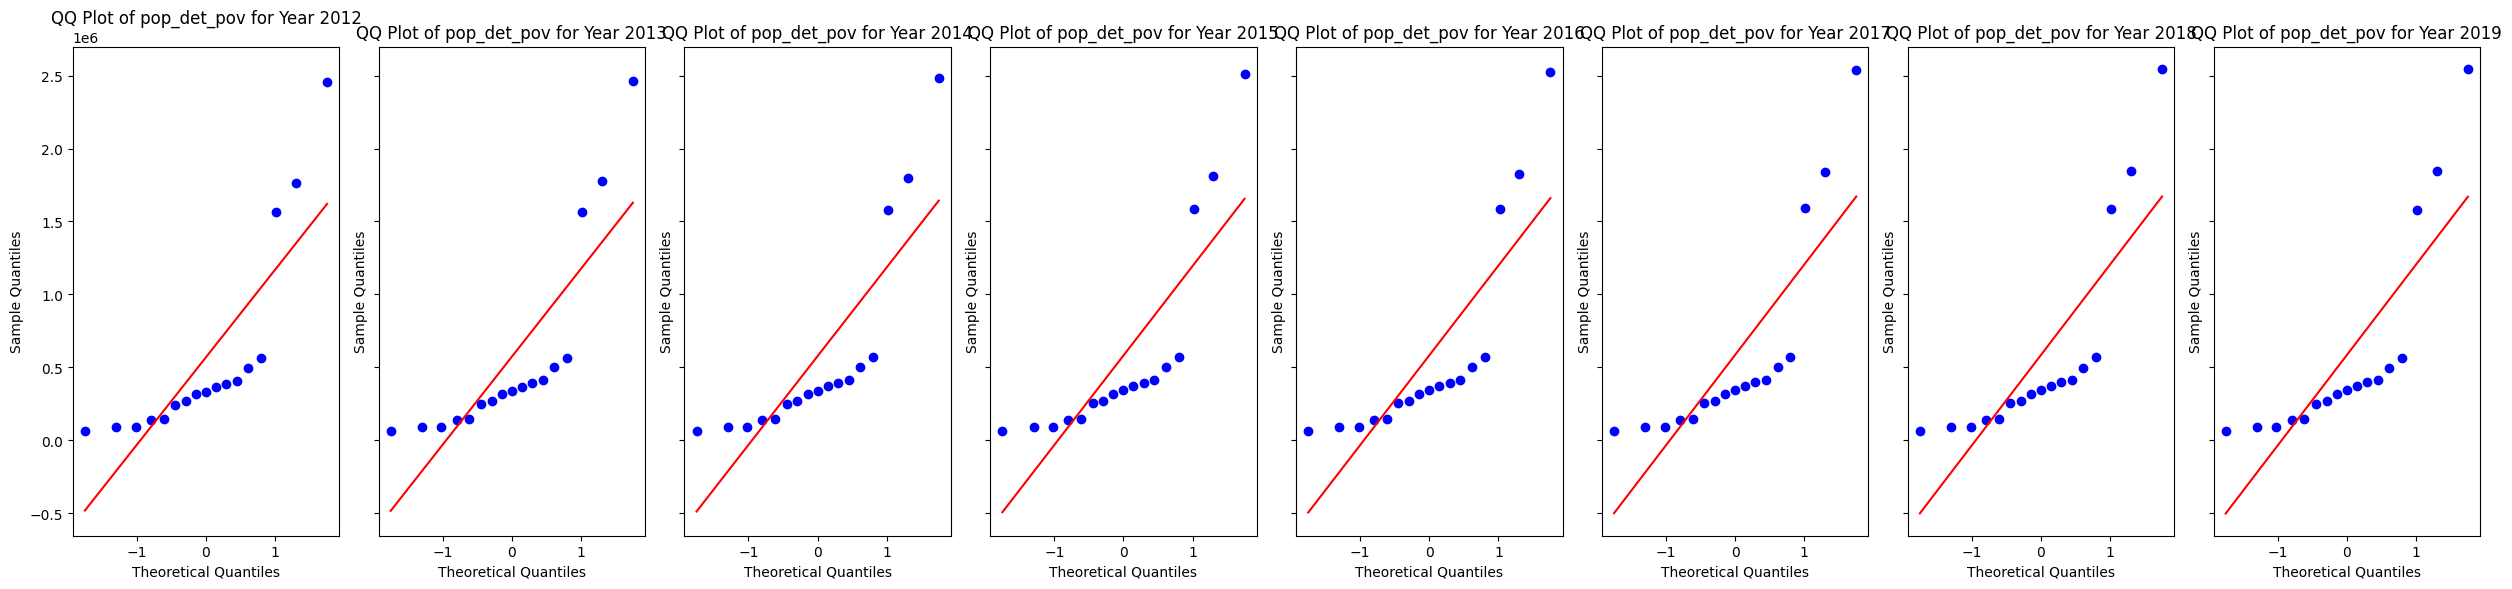

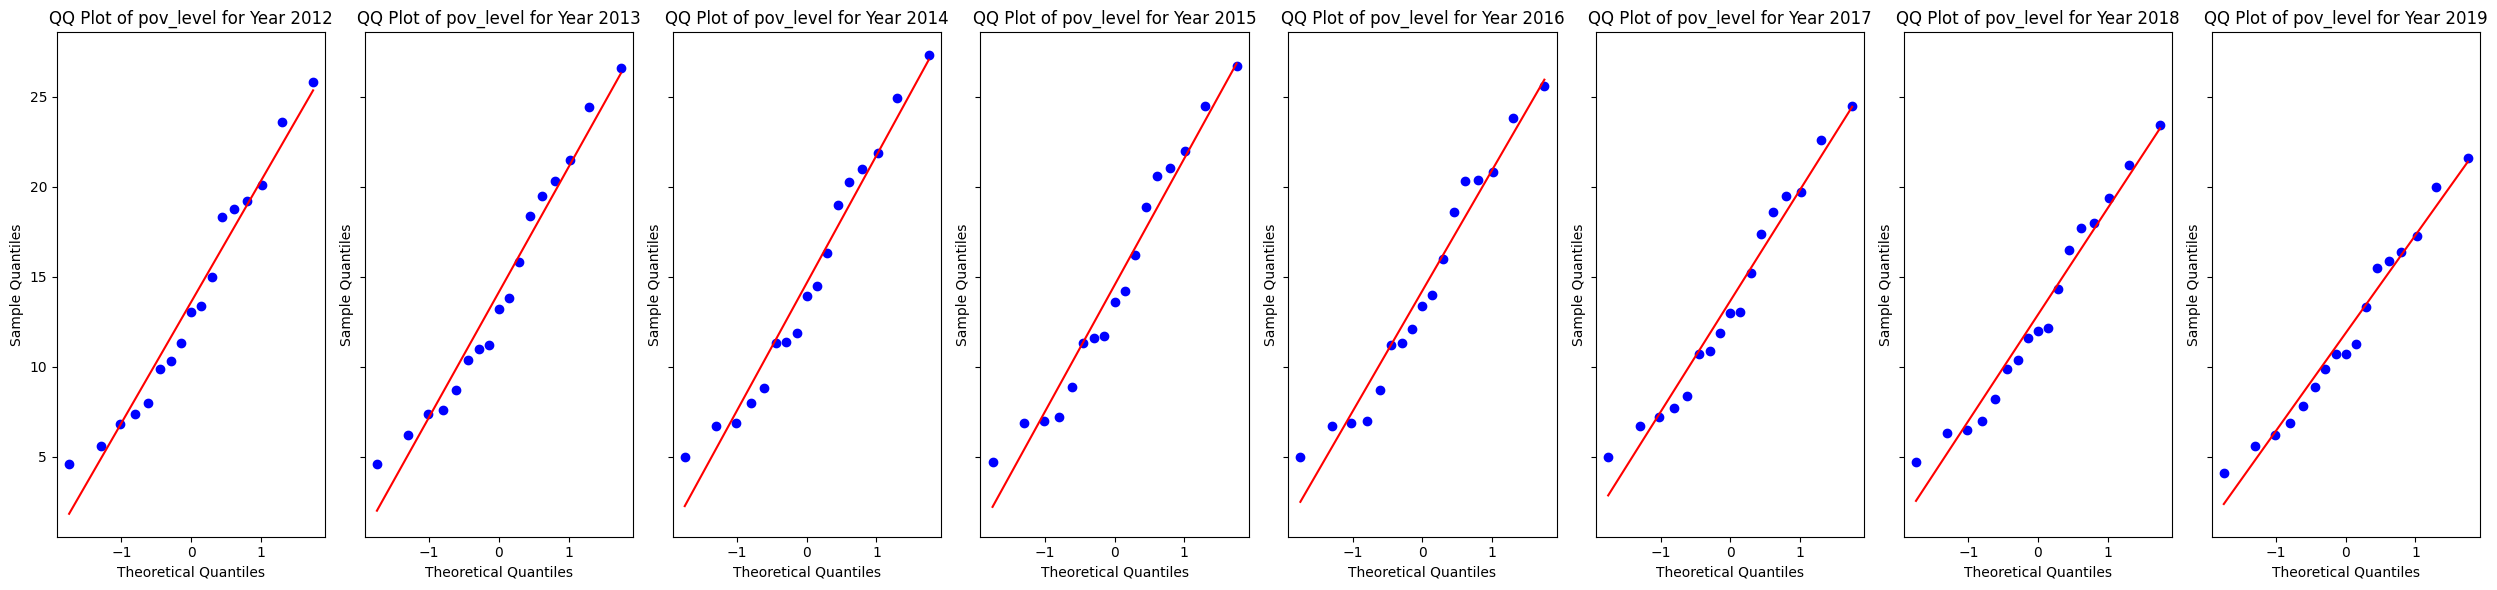

In [ ]:
columns = ['p_crash', 't_pop', 'med_age', 'hs_g', 'lhs_g', 'pop_15', 'med_inc', 'pop_det_pov', 'pov_level']

for column in columns:

    fig, axes = plt.subplots(1, 8, figsize=(25, 6), sharey=True)

    years = combined_data['Year'].unique()
    for i, year in enumerate(years):
        ax = axes[i]
        stats.probplot(combined_data[combined_data['Year'] == year][column], dist='norm', plot=ax)
        ax.set_title(f'QQ Plot of {column} for Year {year}')
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Sample Quantiles')

    plt.tight_layout()
    plt.show()

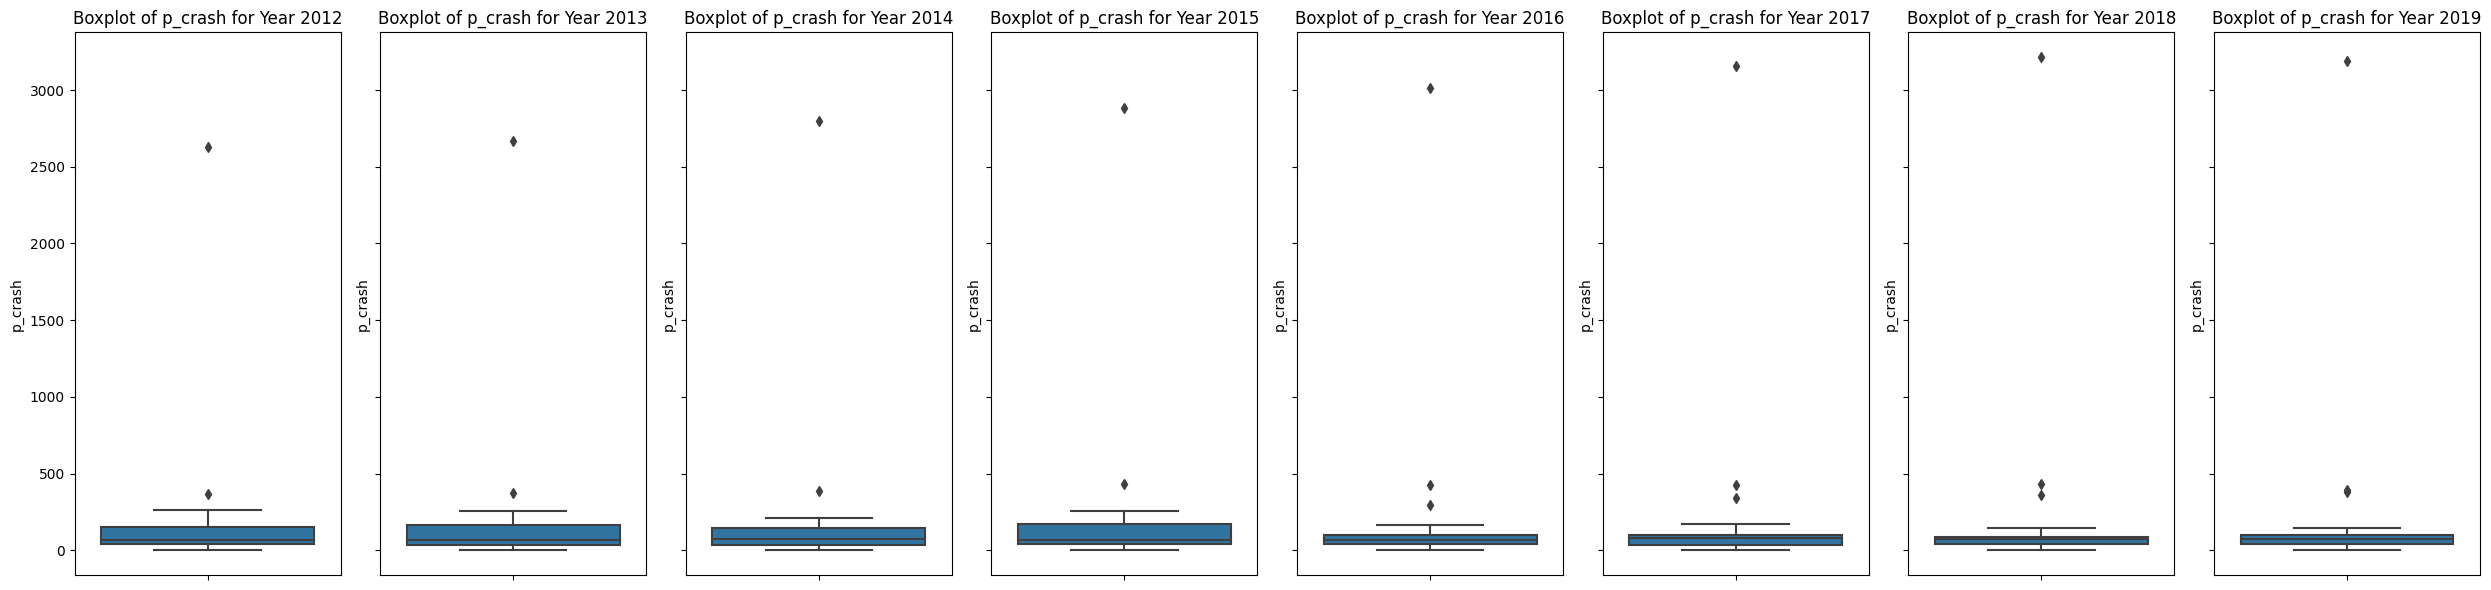

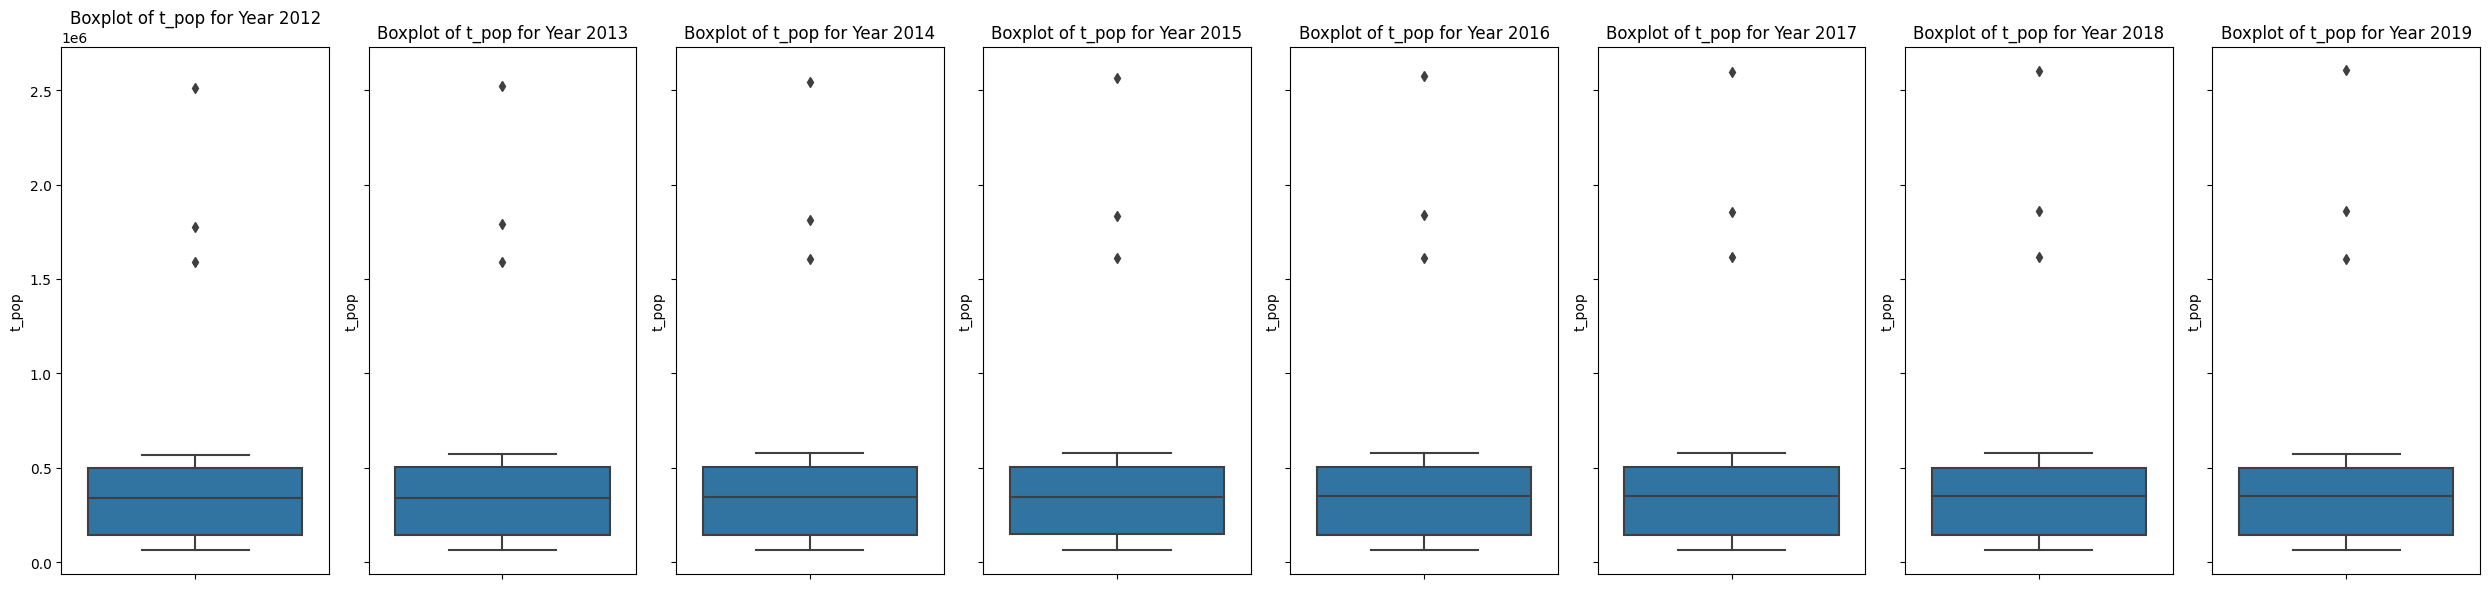

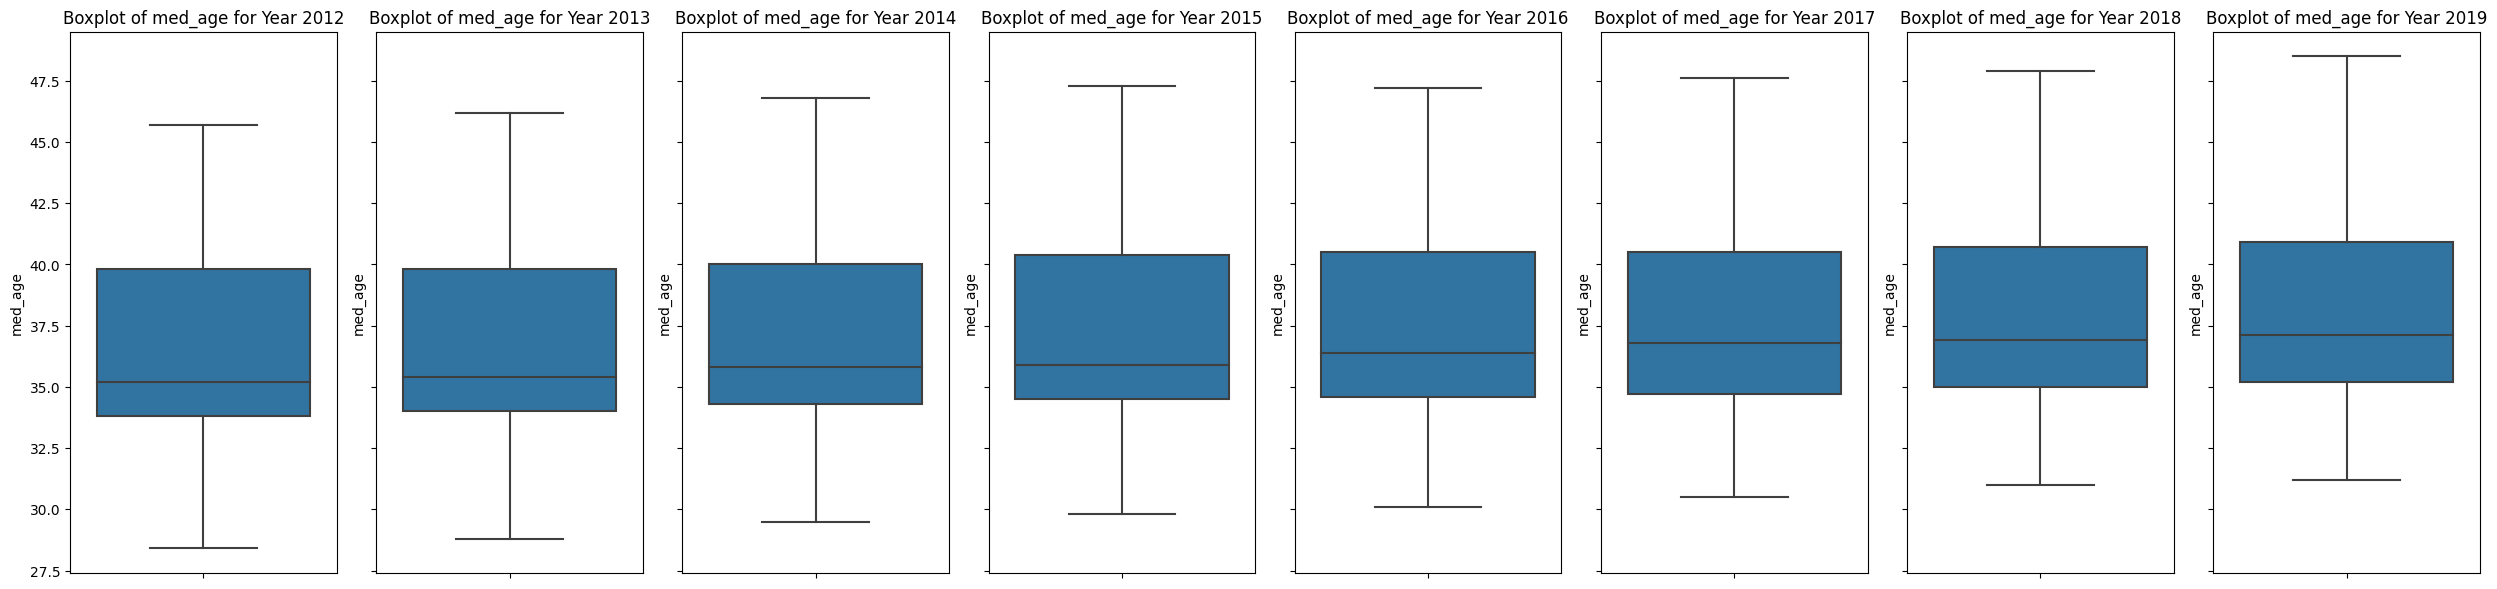

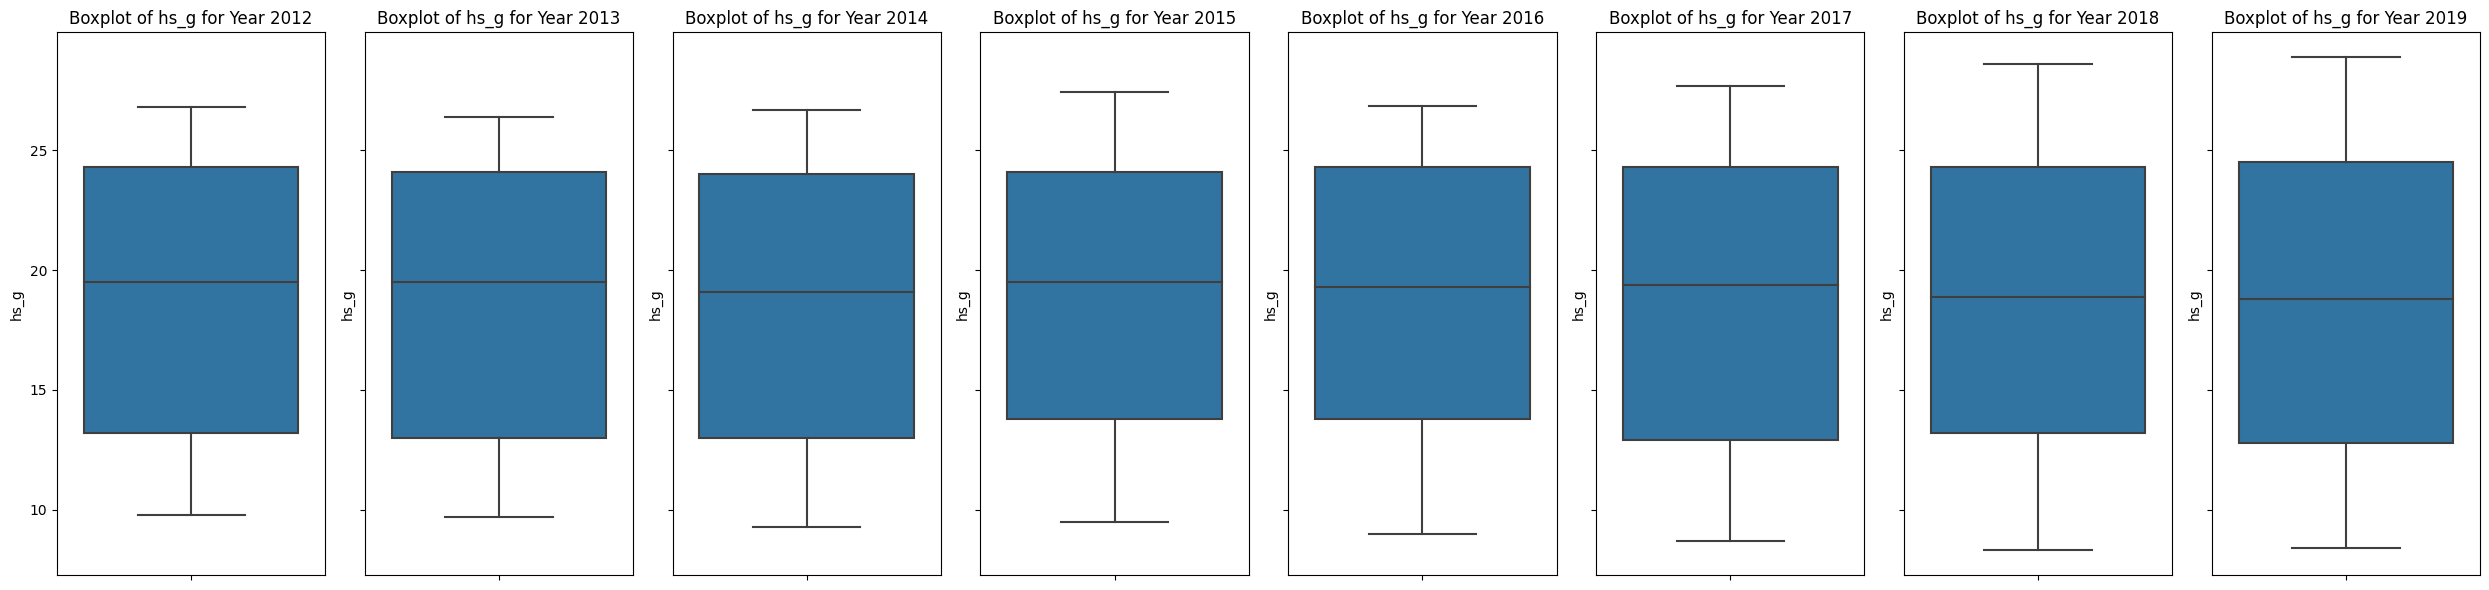

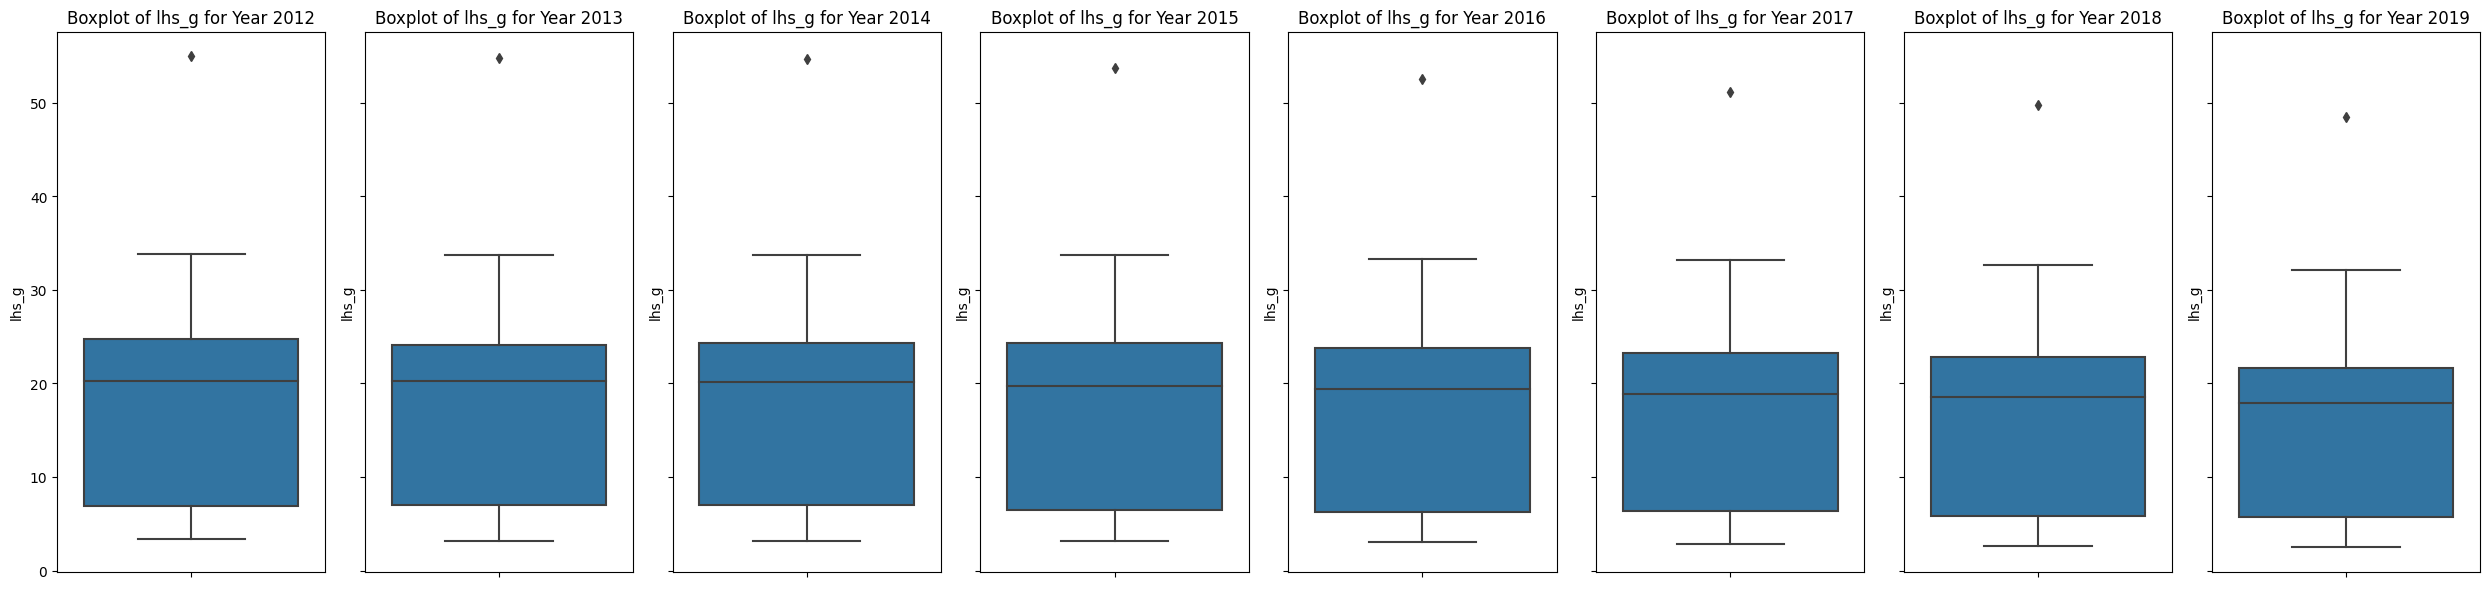

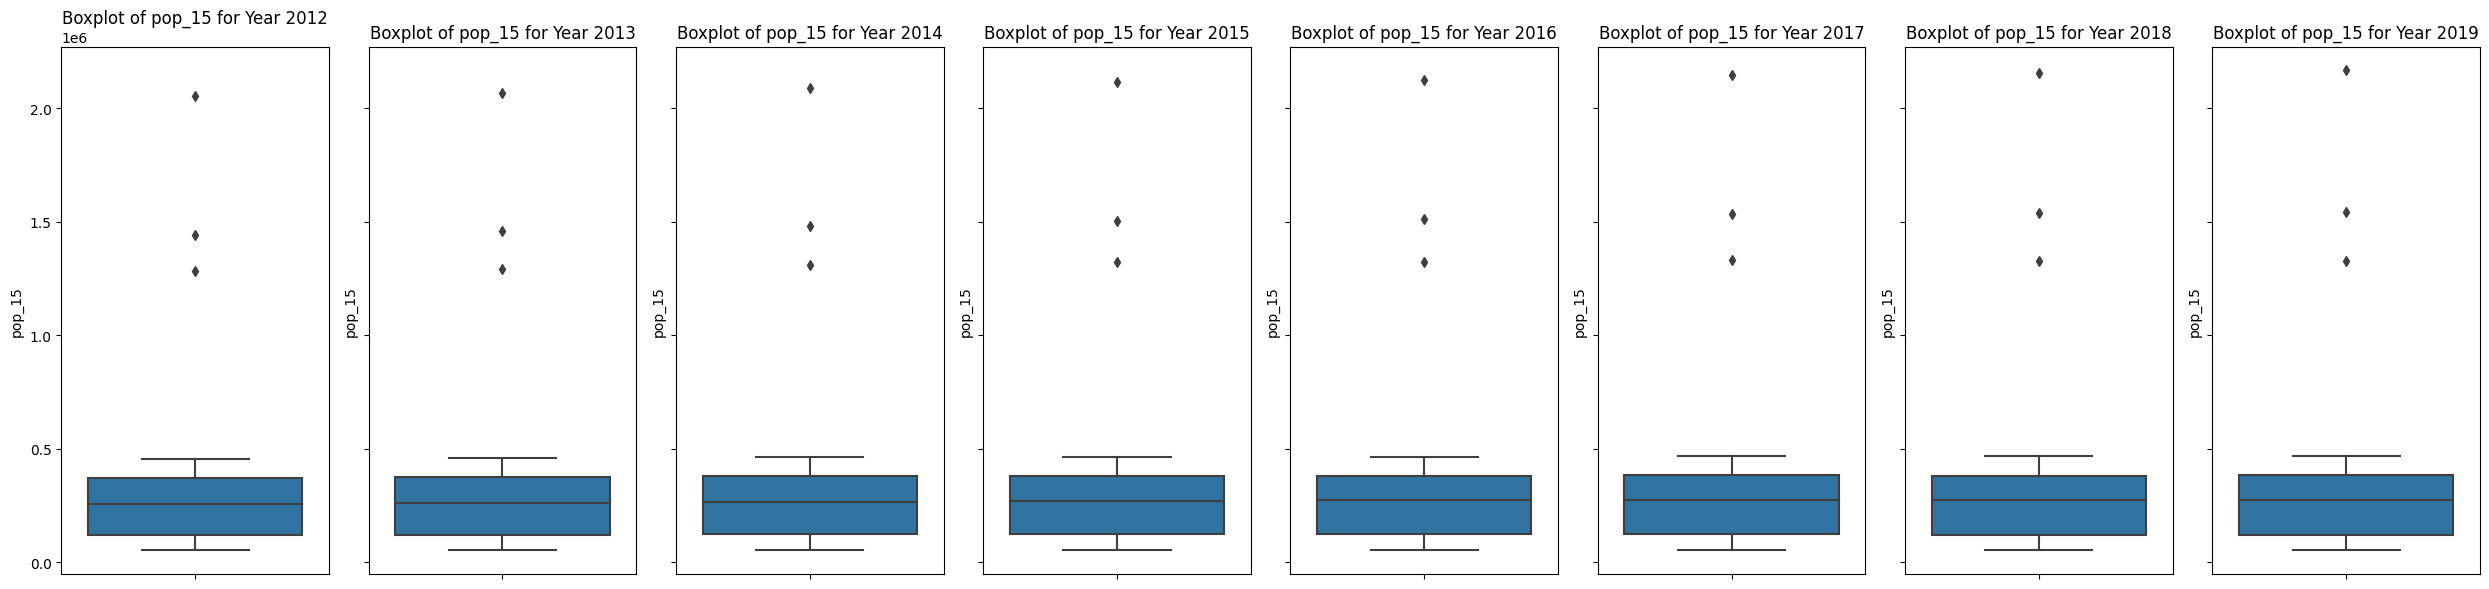

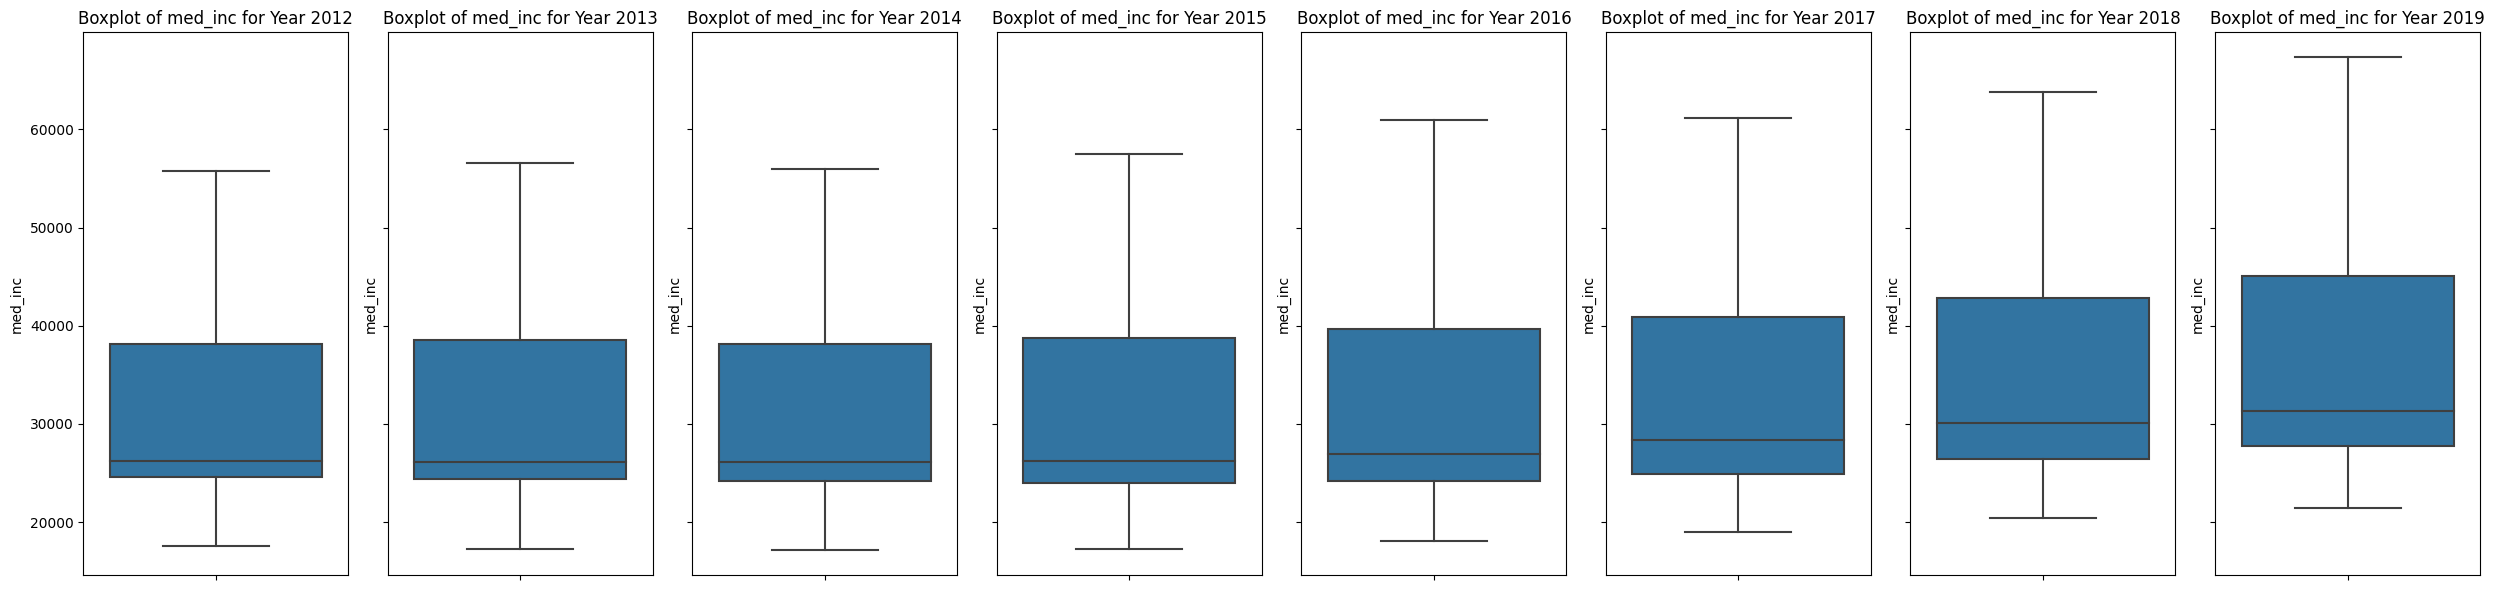

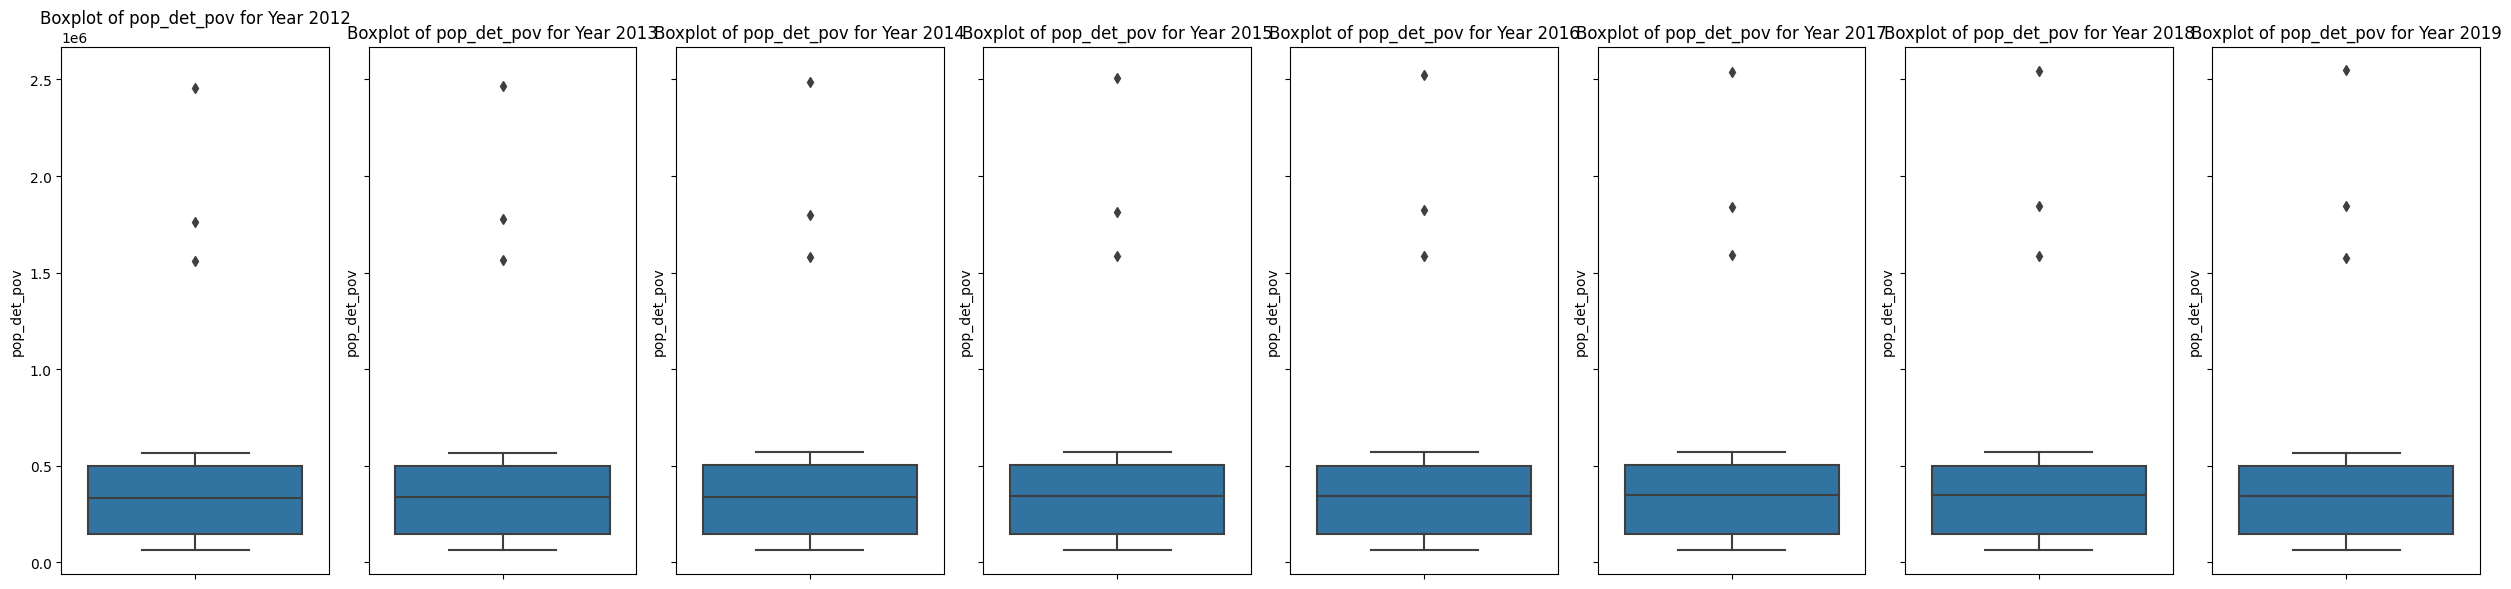

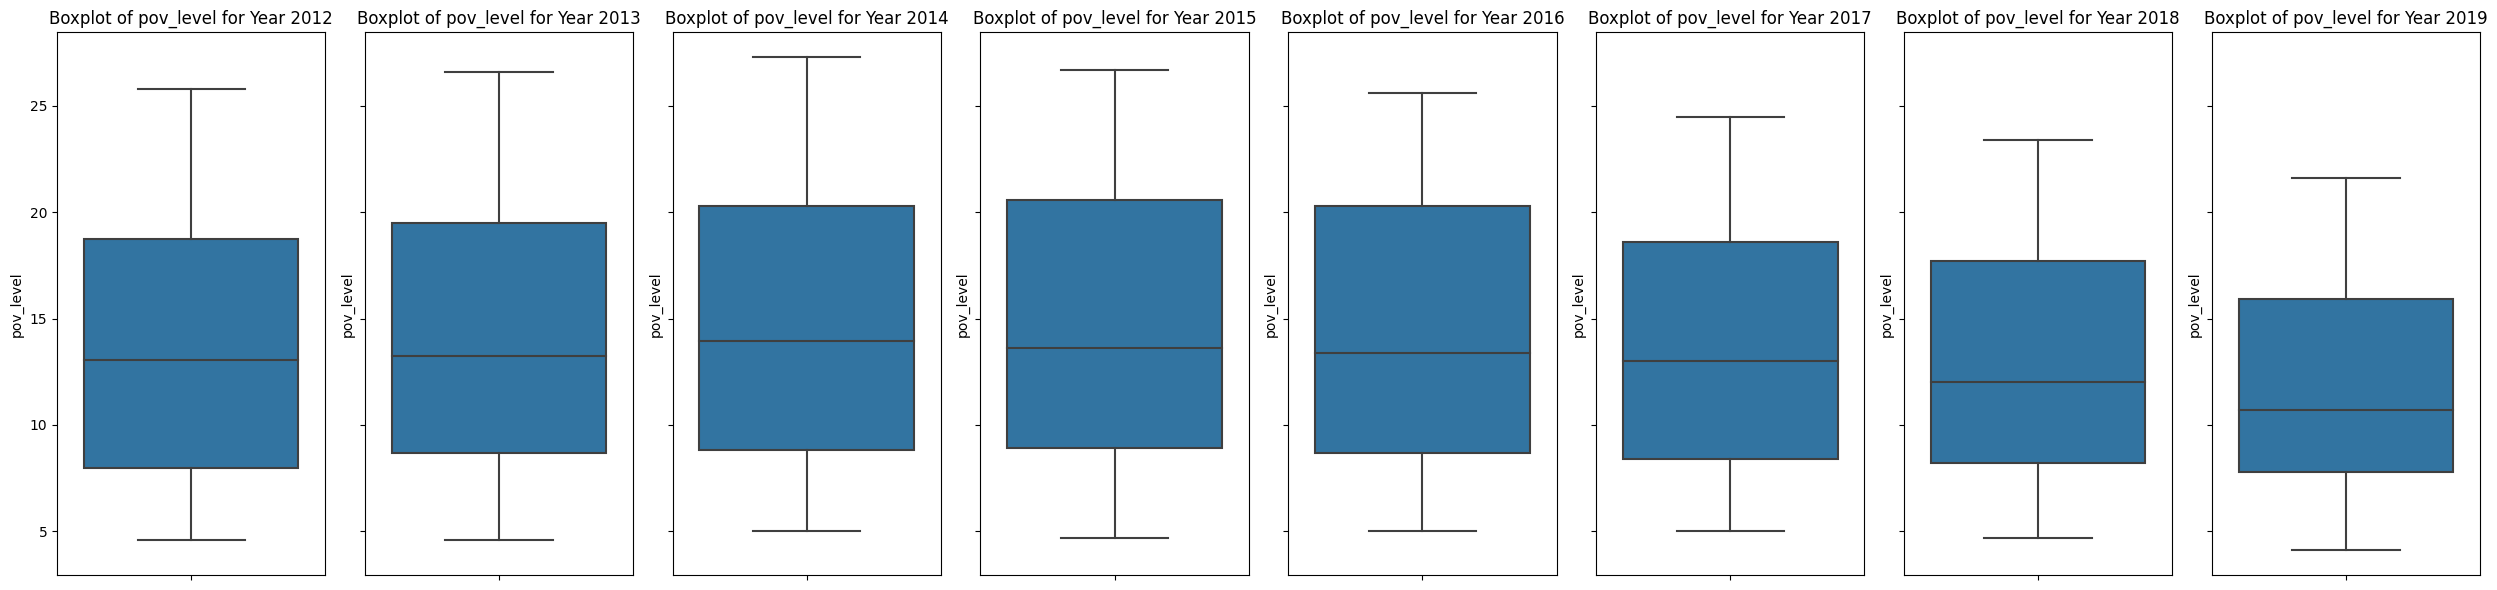

In [ ]:
columns = ['p_crash', 't_pop', 'med_age', 'hs_g', 'lhs_g', 'pop_15', 'med_inc', 'pop_det_pov', 'pov_level']
years = sorted(combined_data['Year'].unique())

for column in columns:
    fig, axes = plt.subplots(1, len(years), figsize=(25, 6), sharey=True)

    for i, year in enumerate(years):
        ax = axes[i]
        sns.boxplot(y=column, data=combined_data[combined_data['Year'] == year], ax=ax)
        ax.set_title(f'Boxplot of {column} for Year {year}')
        ax.set_ylabel(column)

    plt.tight_layout()
    plt.show()

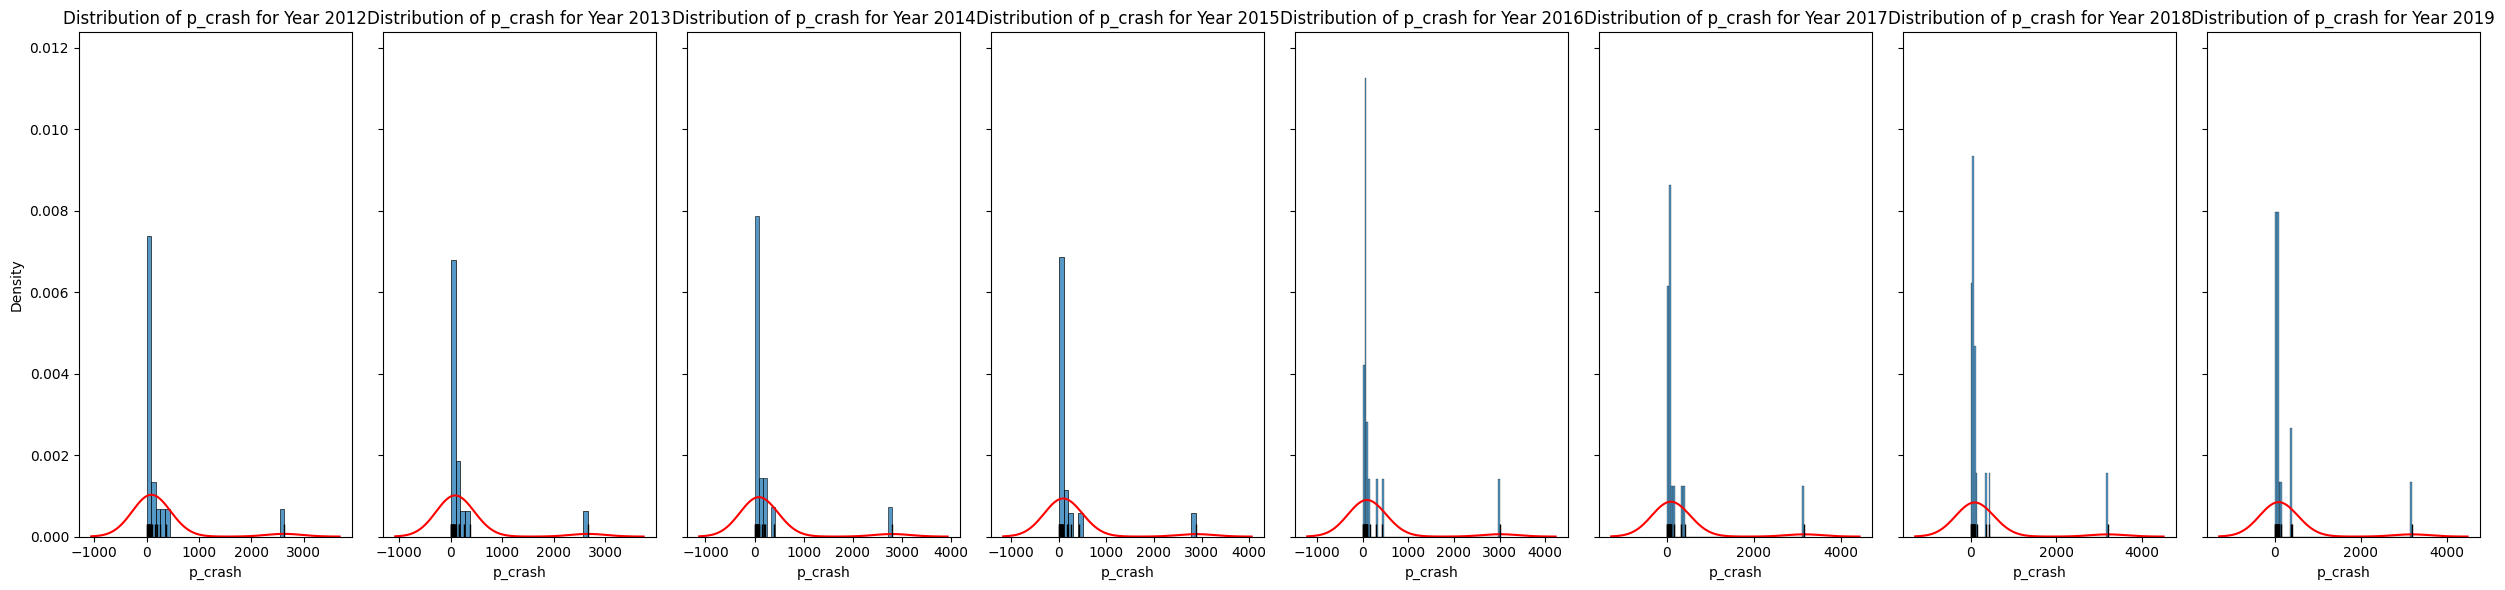

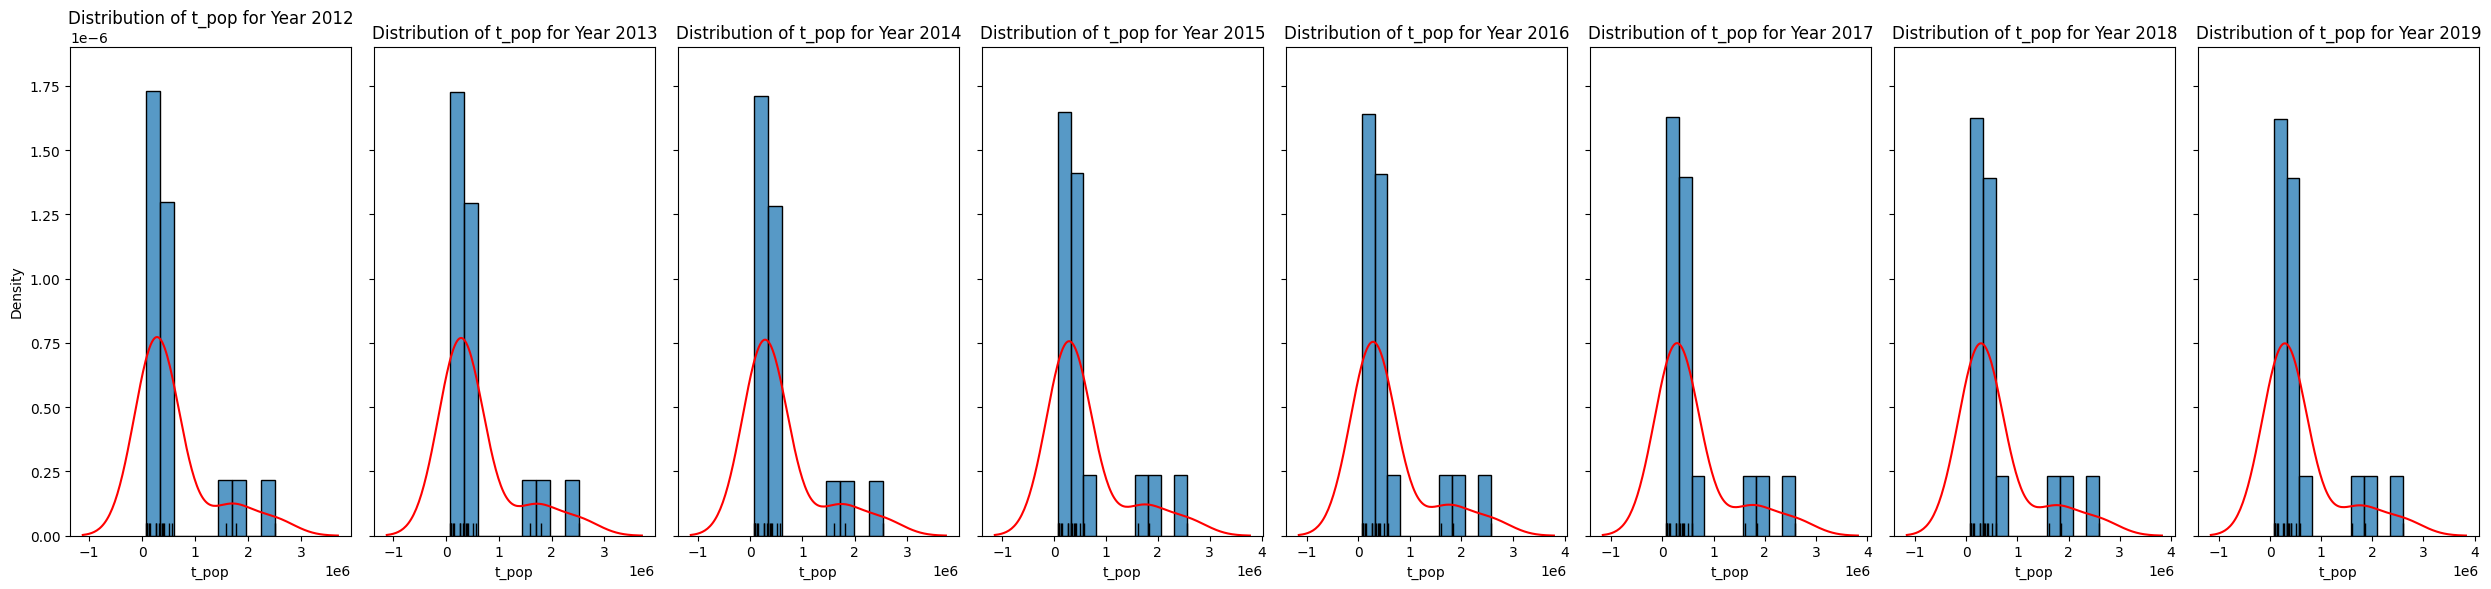

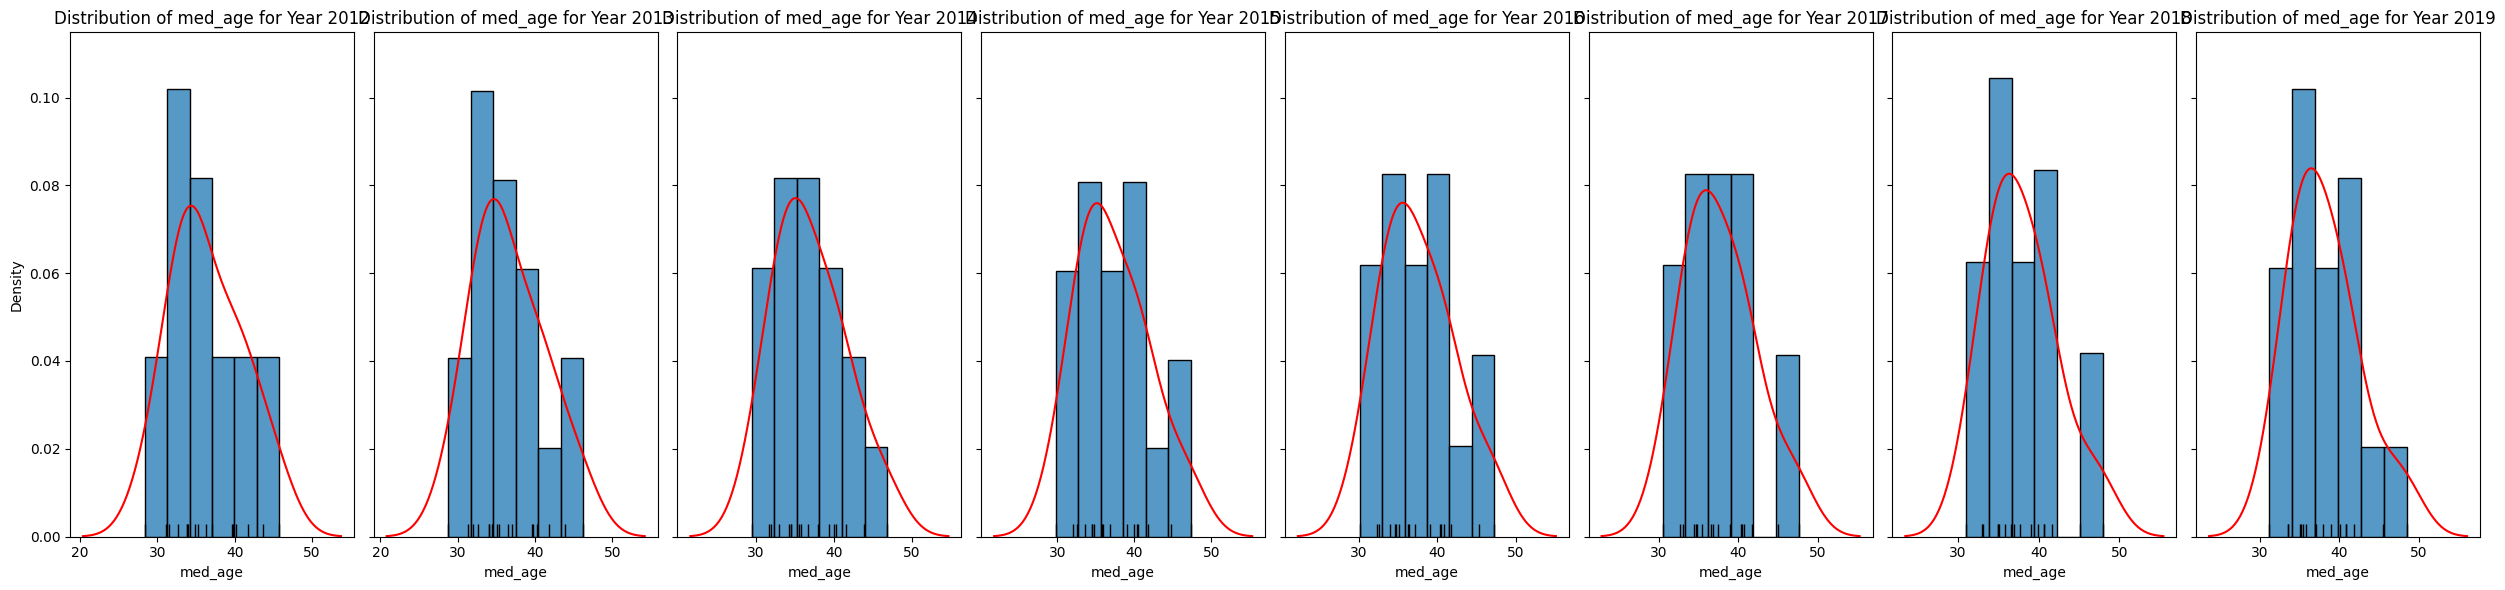

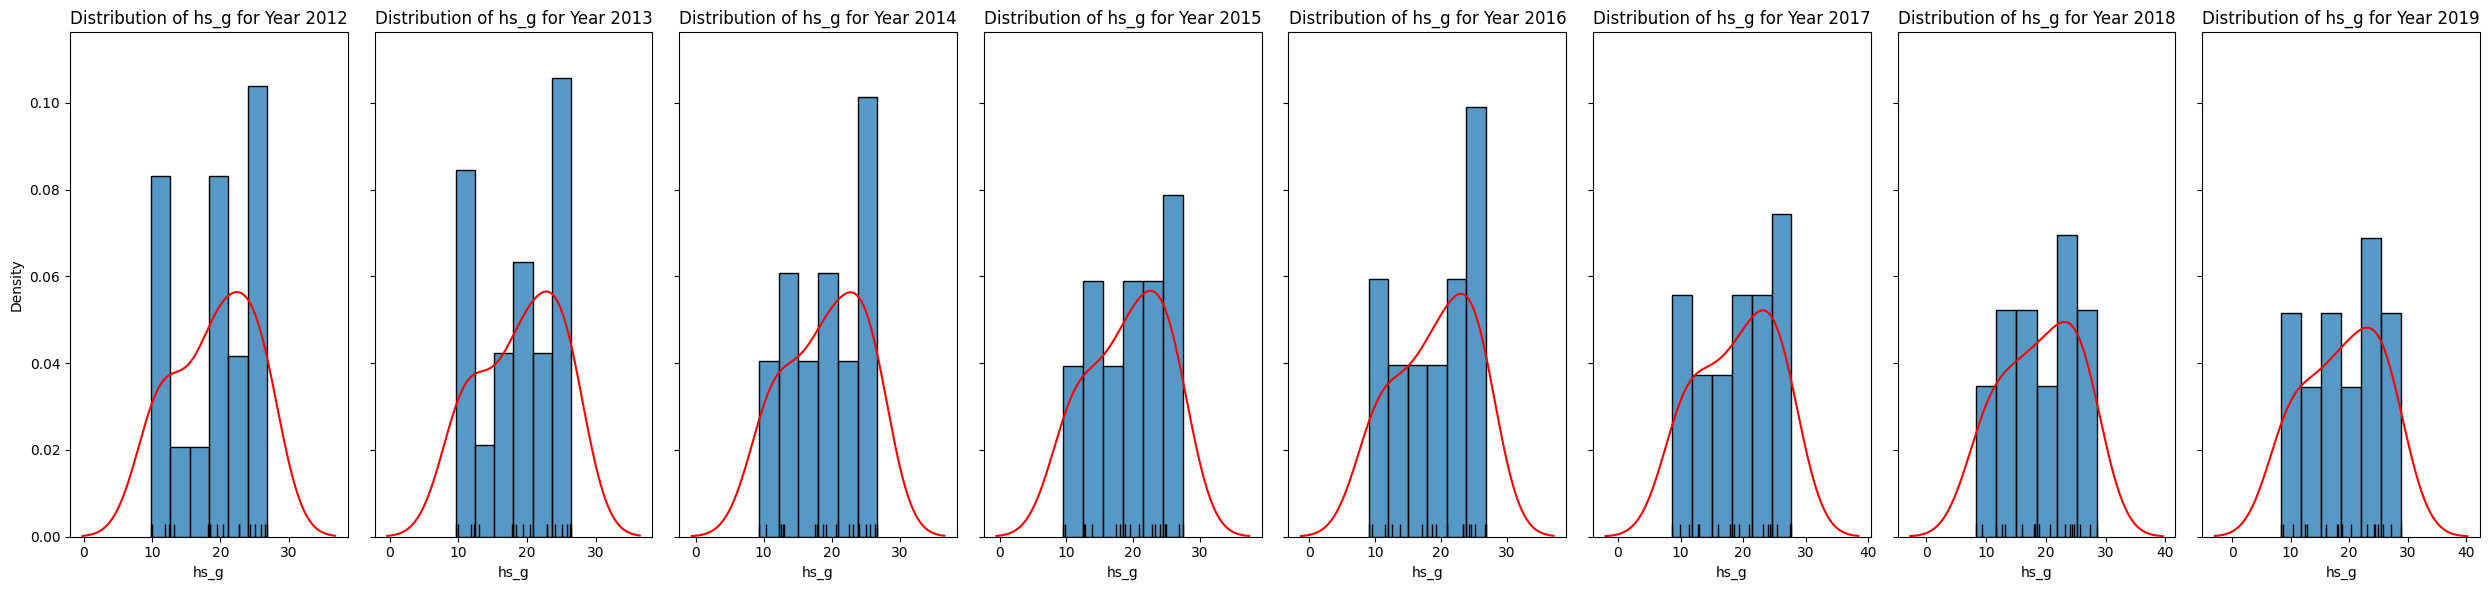

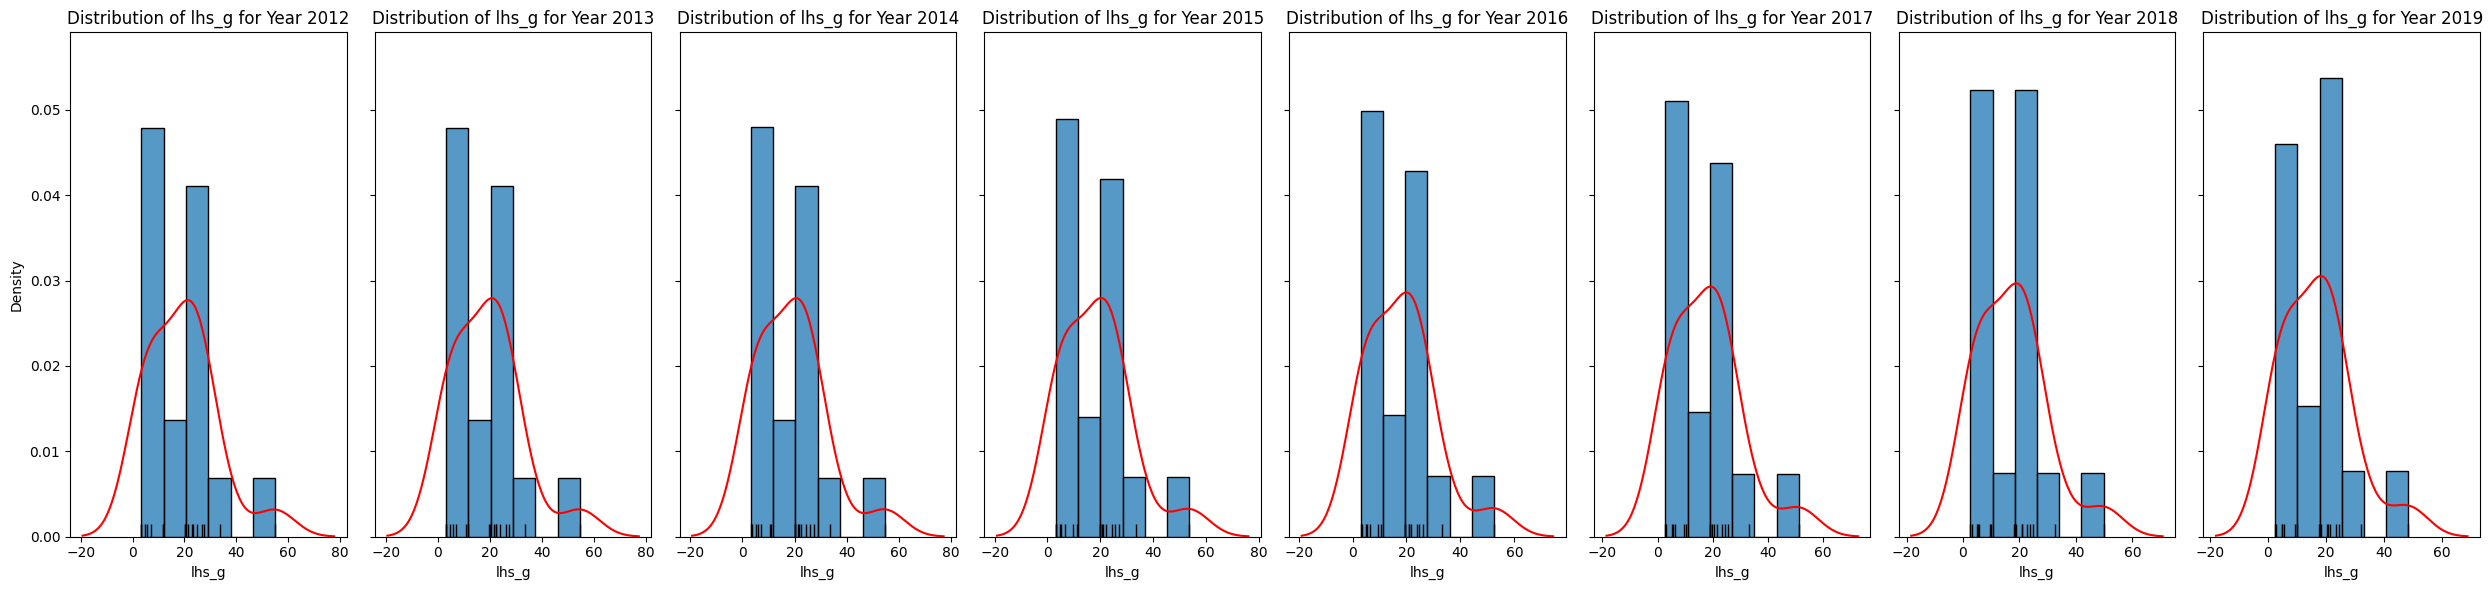

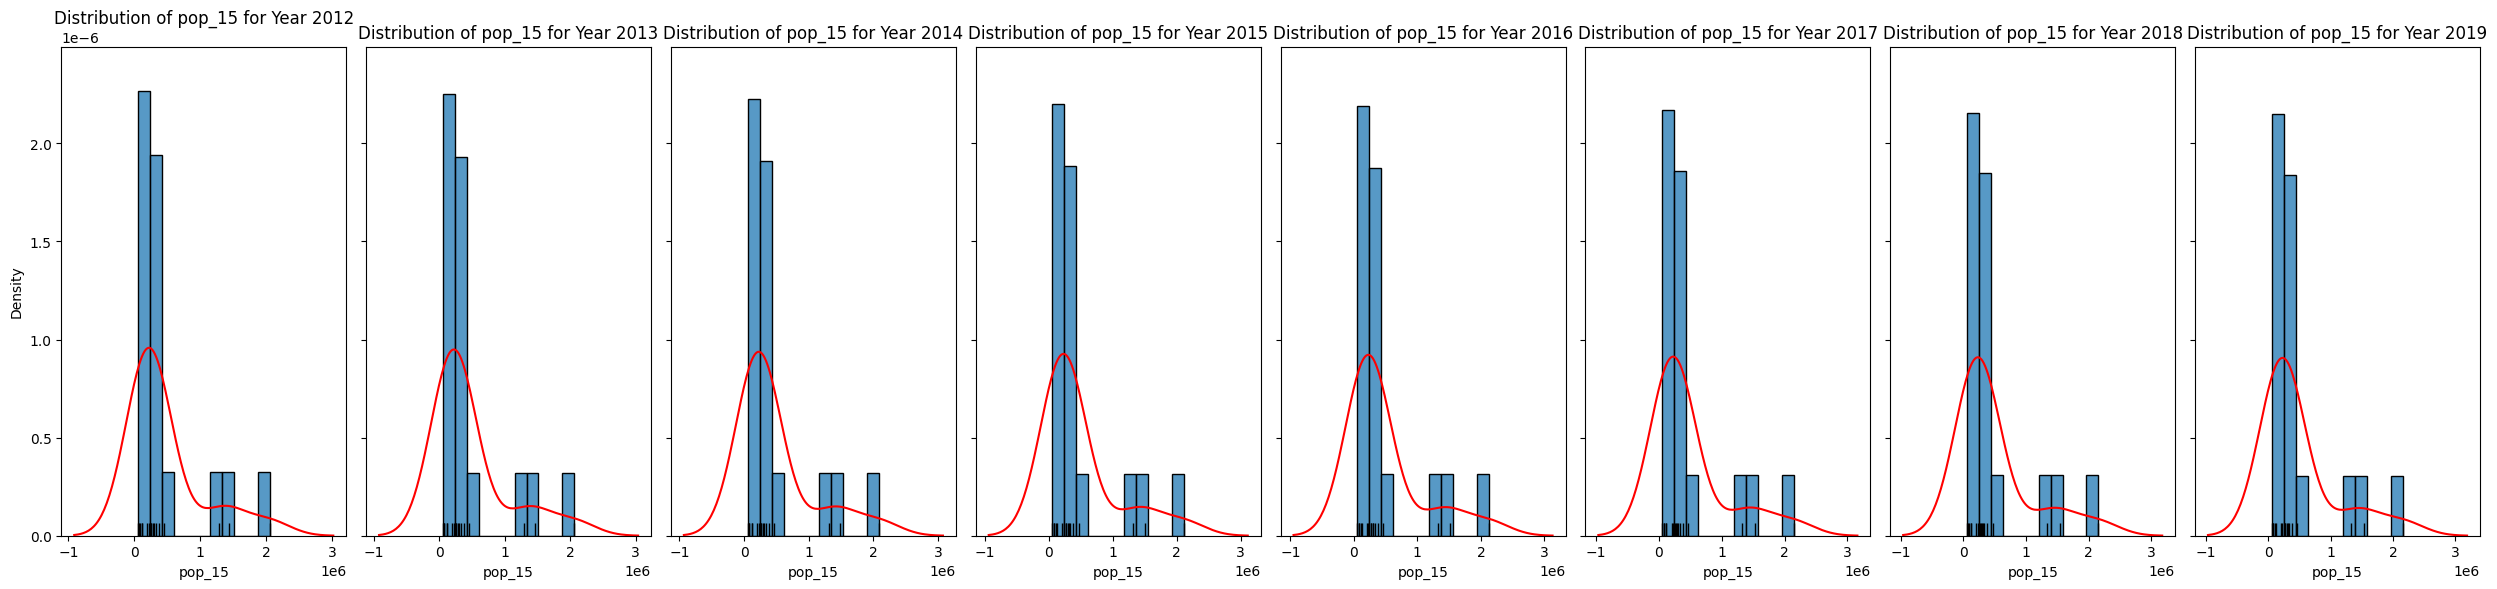

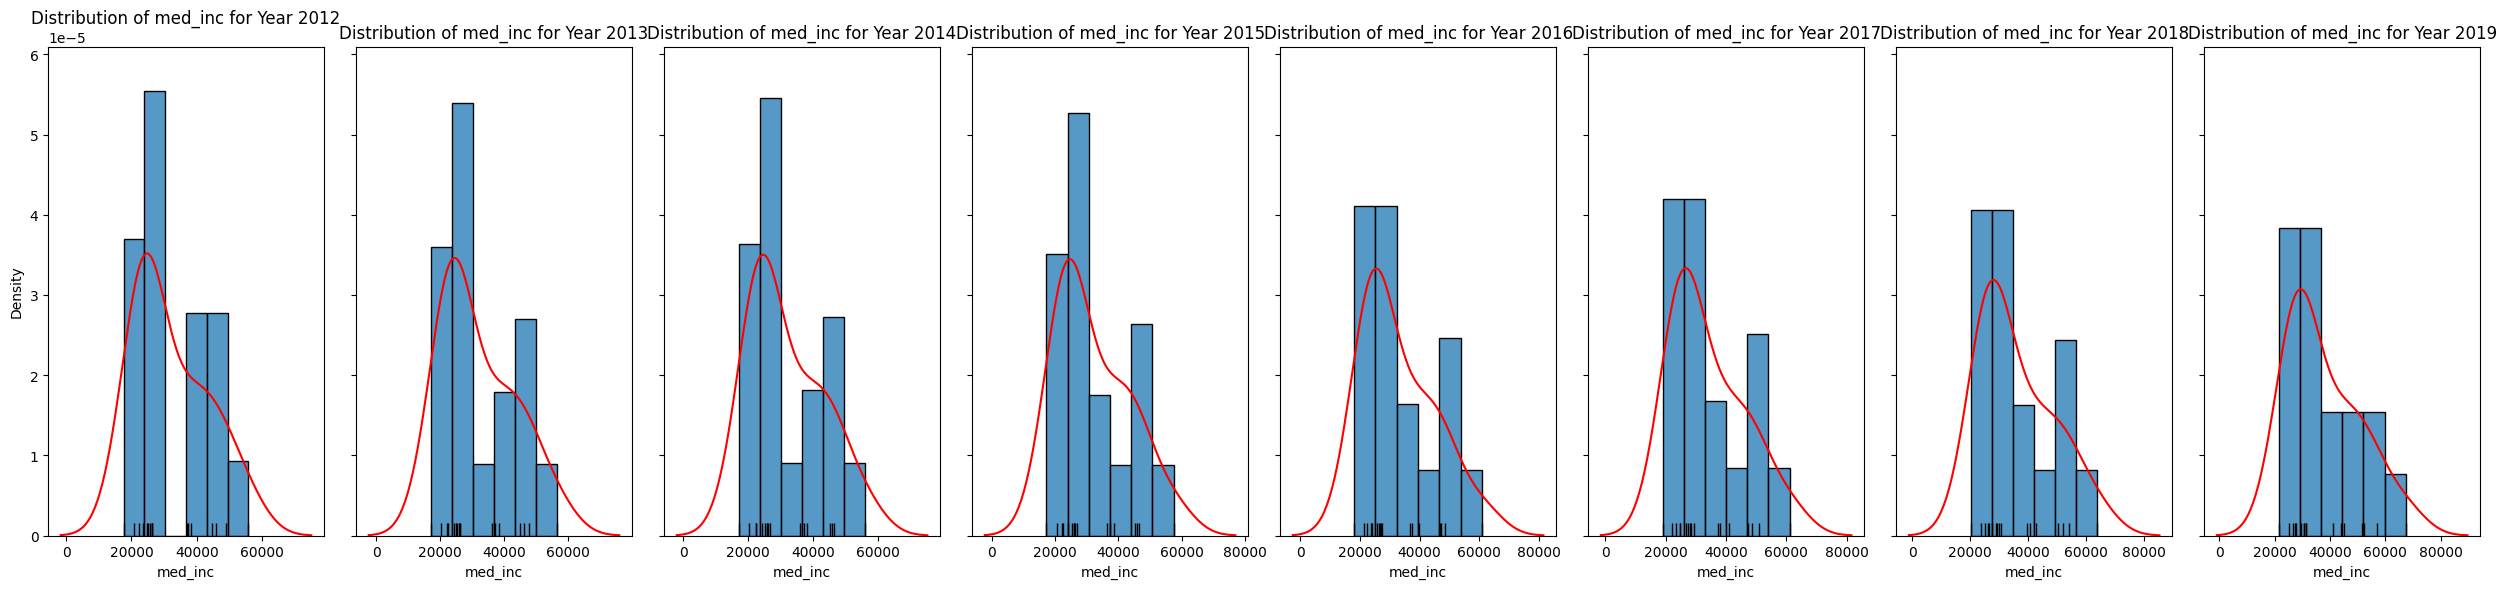

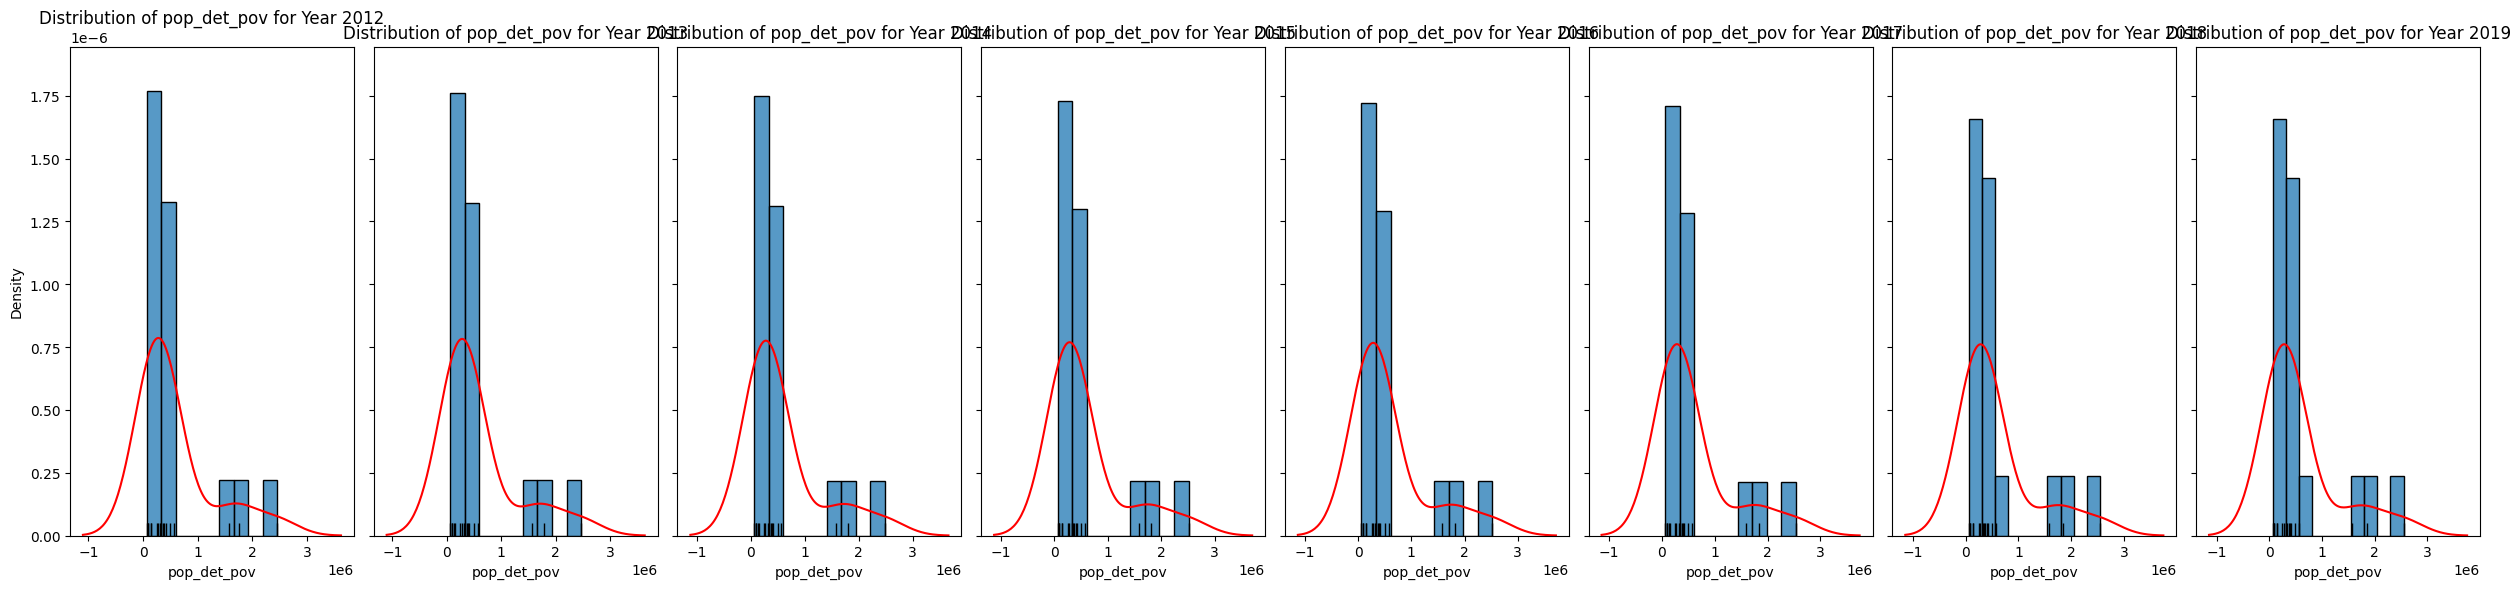

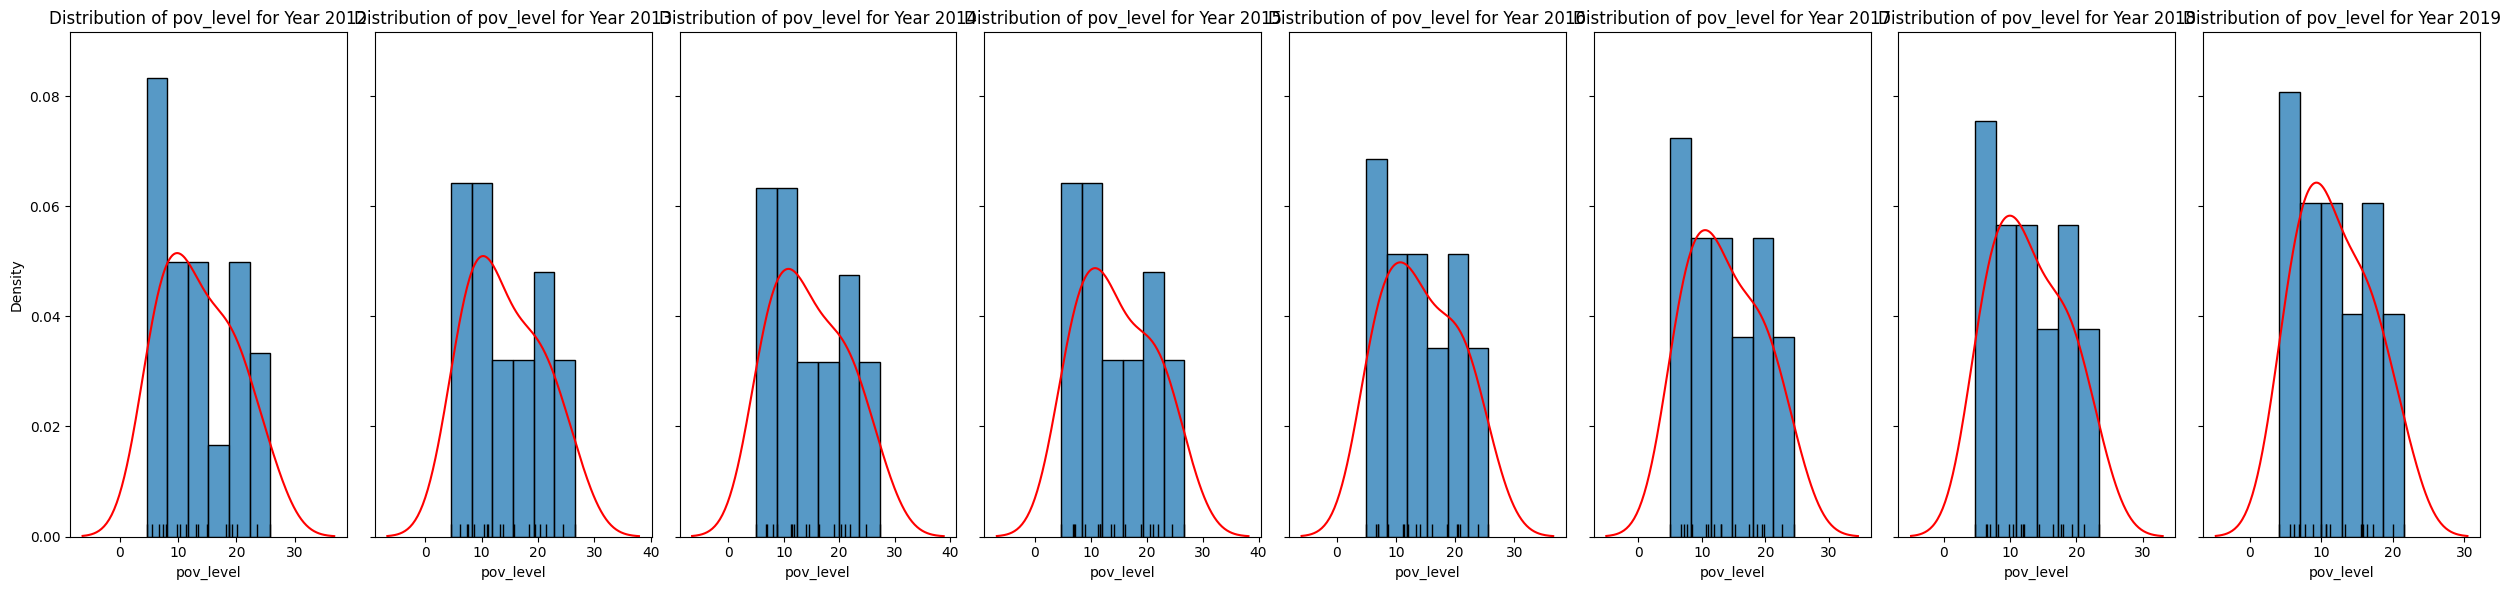

In [ ]:
columns = ['p_crash', 't_pop', 'med_age', 'hs_g', 'lhs_g', 'pop_15', 'med_inc', 'pop_det_pov', 'pov_level']

for column in columns:

    fig, axes = plt.subplots(1, 8, figsize=(25, 6), sharey=True)

    years = combined_data['Year'].unique()
    for i, year in enumerate(years):
        ax = axes[i]
        sns.histplot(combined_data[combined_data['Year'] == year][column], stat="density", ax=ax)
        sns.kdeplot(combined_data[combined_data['Year'] == year][column], color='red', ax=ax)
        sns.rugplot(combined_data[combined_data['Year'] == year][column], color='black', ax=ax)
        ax.set_title(f'Distribution of {column} for Year {year}')
        ax.set_xlabel(column)
        ax.set_ylabel('Density')

    plt.tight_layout()
    plt.show()

In [ ]:
combined_data['p_crash_log'] = np.log(combined_data['p_crash'] + 1)
combined_data['pov_level_log'] = np.log(combined_data['pov_level'] + 1)
combined_data['med_inc_log'] = np.log(combined_data['med_inc'] + 1)
combined_data['t_pop_log'] = np.log(combined_data['t_pop'] + 1)
combined_data['pop_15_log'] = np.log(combined_data['pop_15'] + 1)
combined_data['pop_det_pov_log'] = np.log(combined_data['pop_det_pov'] + 1)

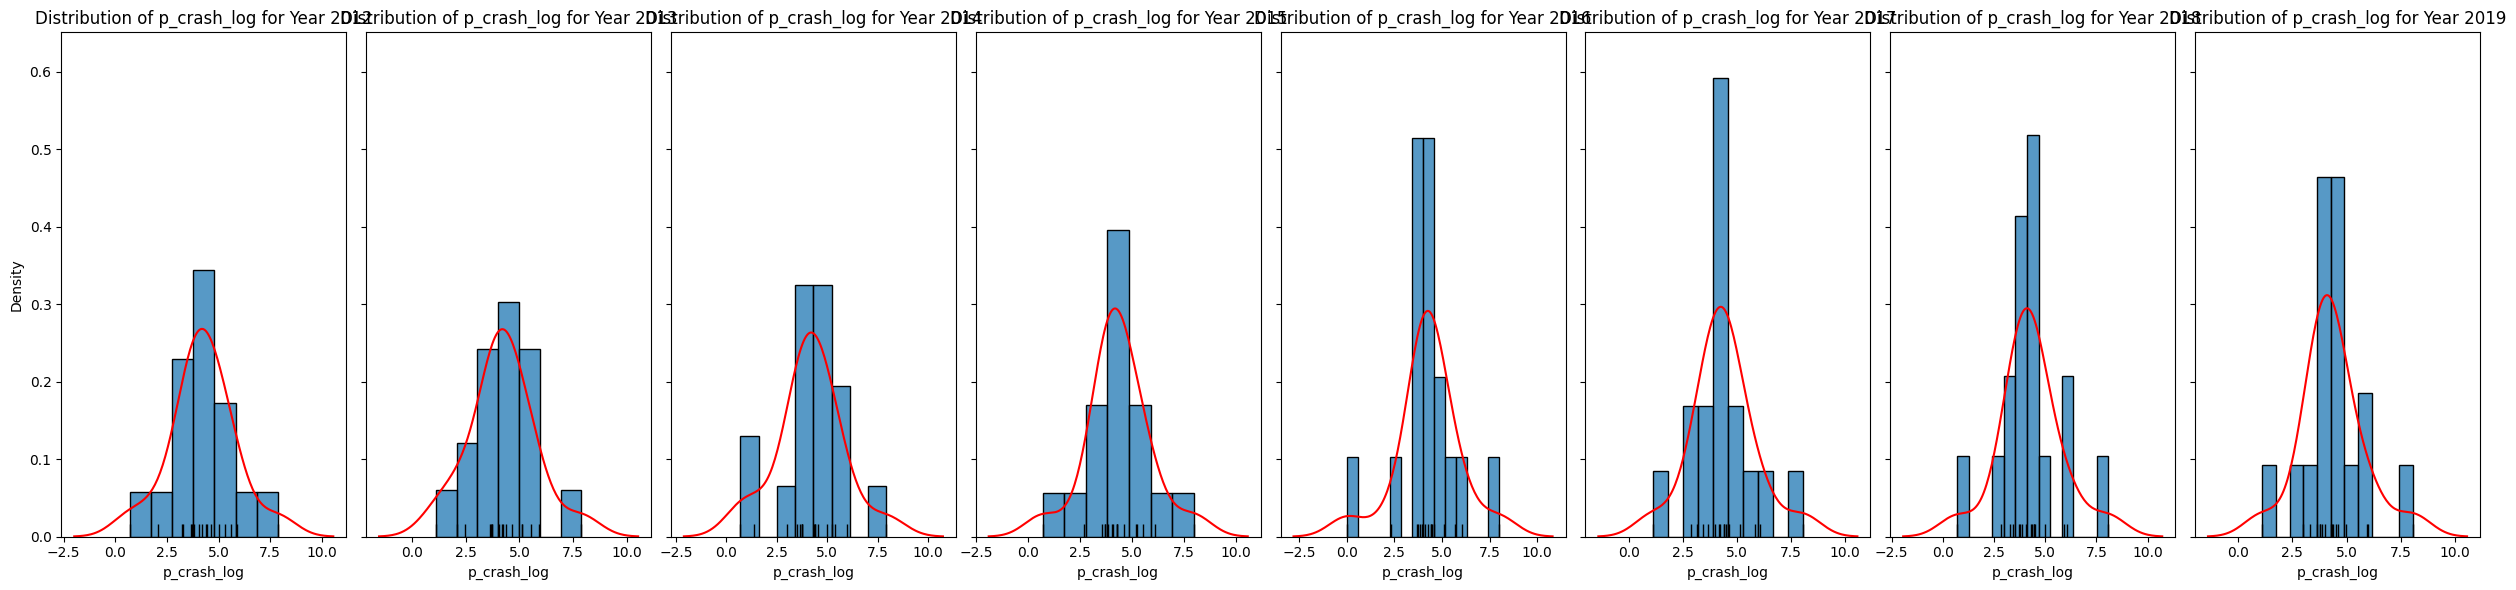

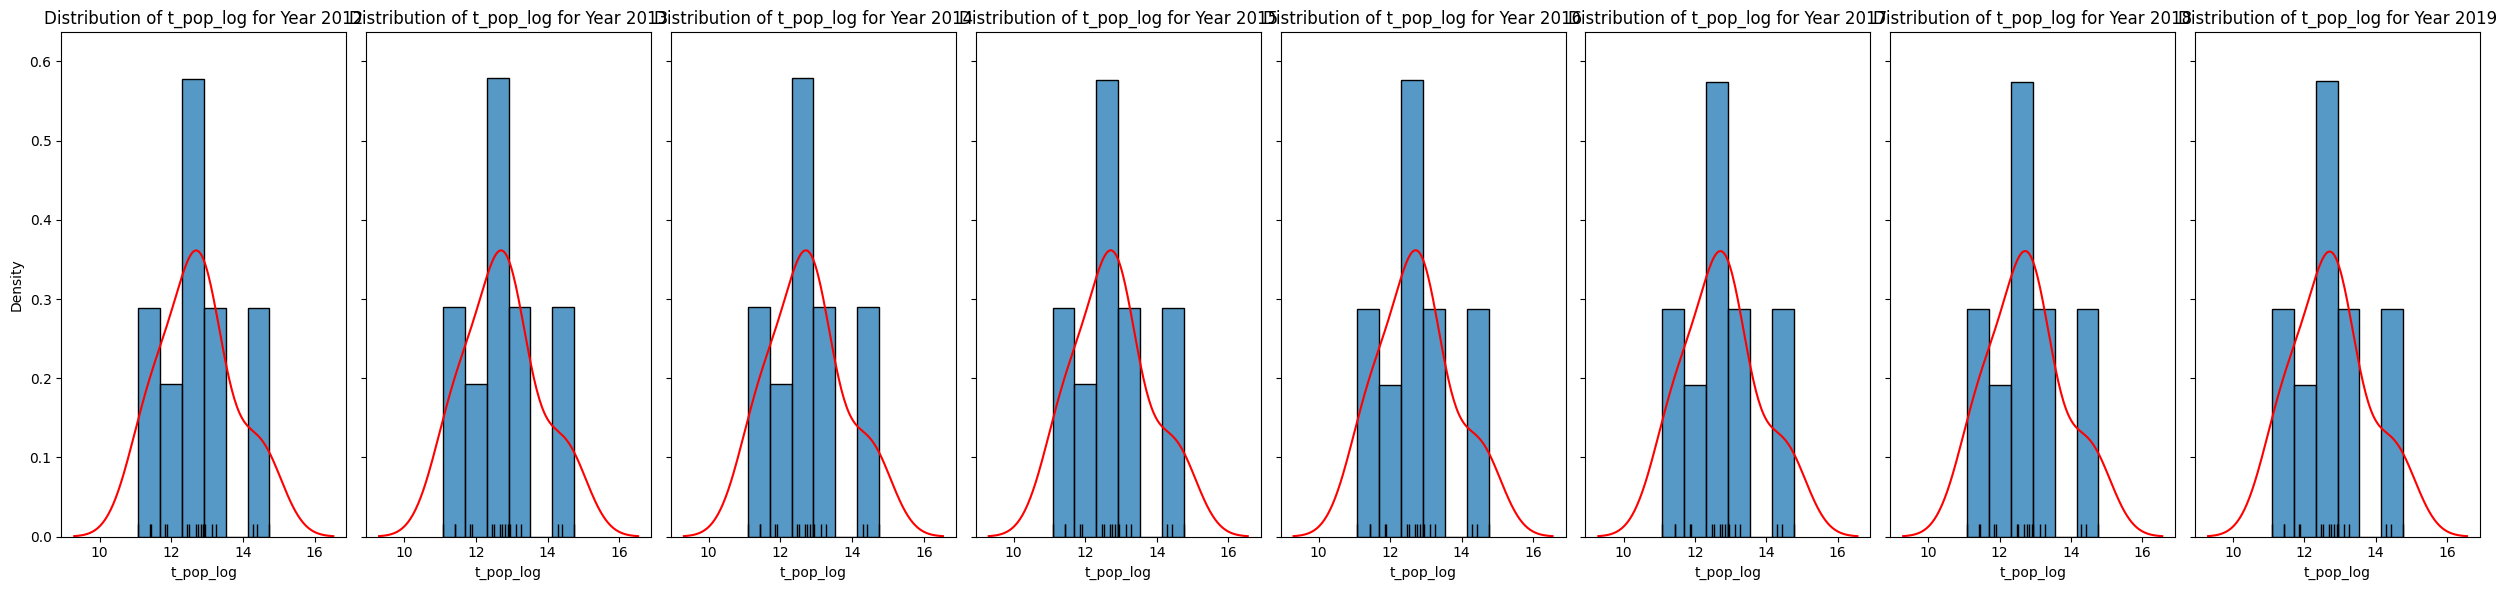

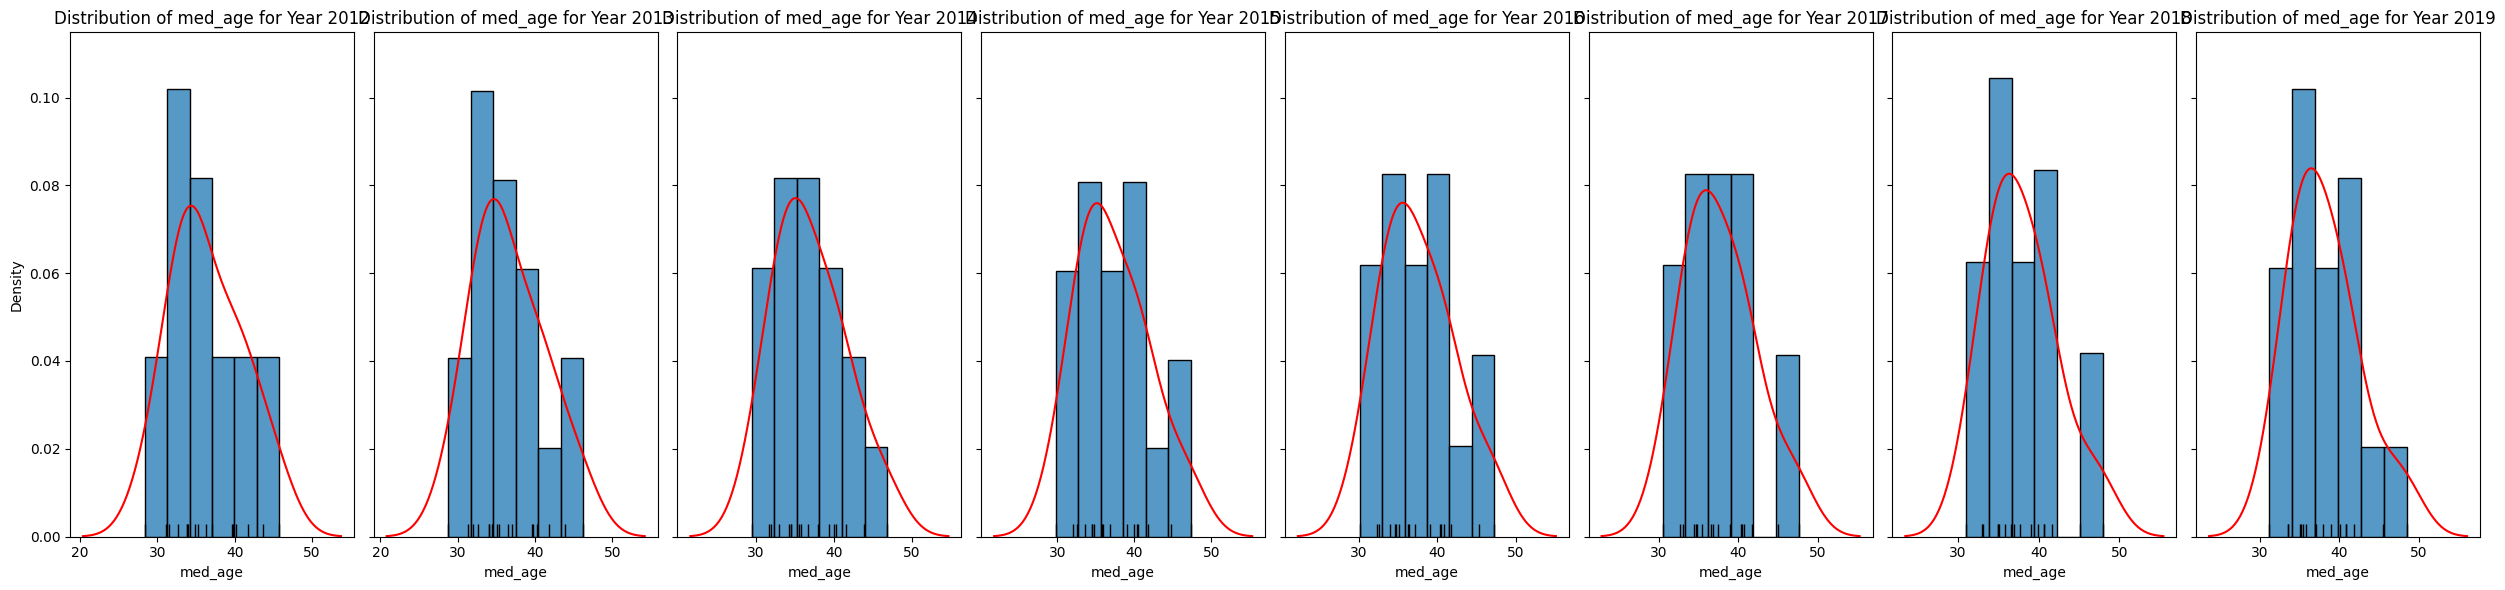

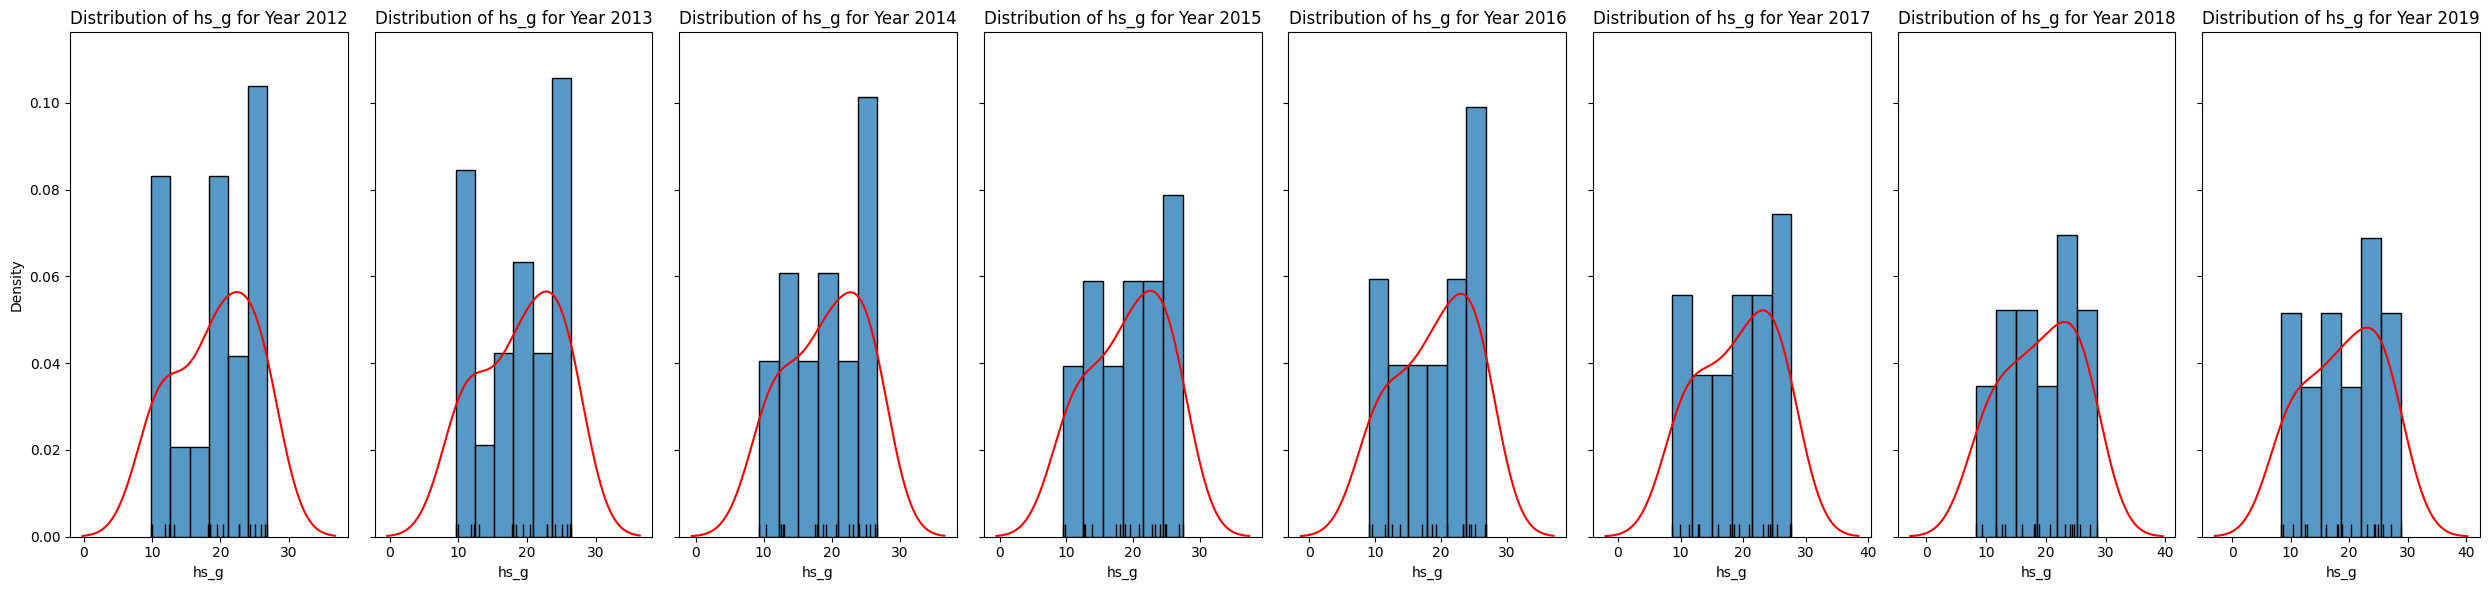

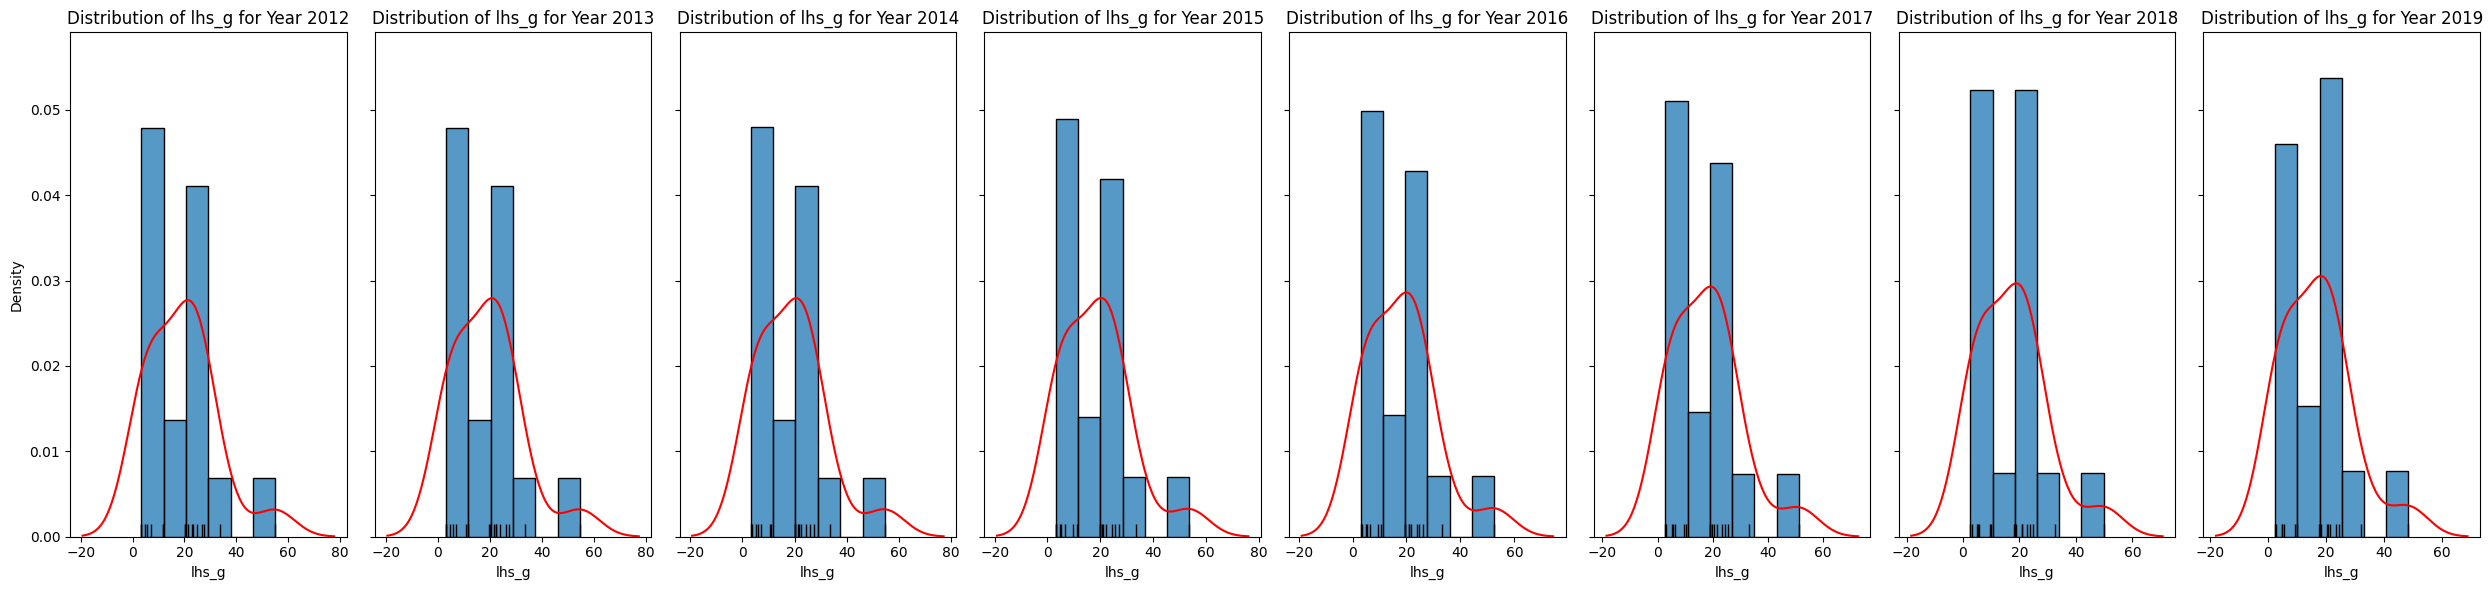

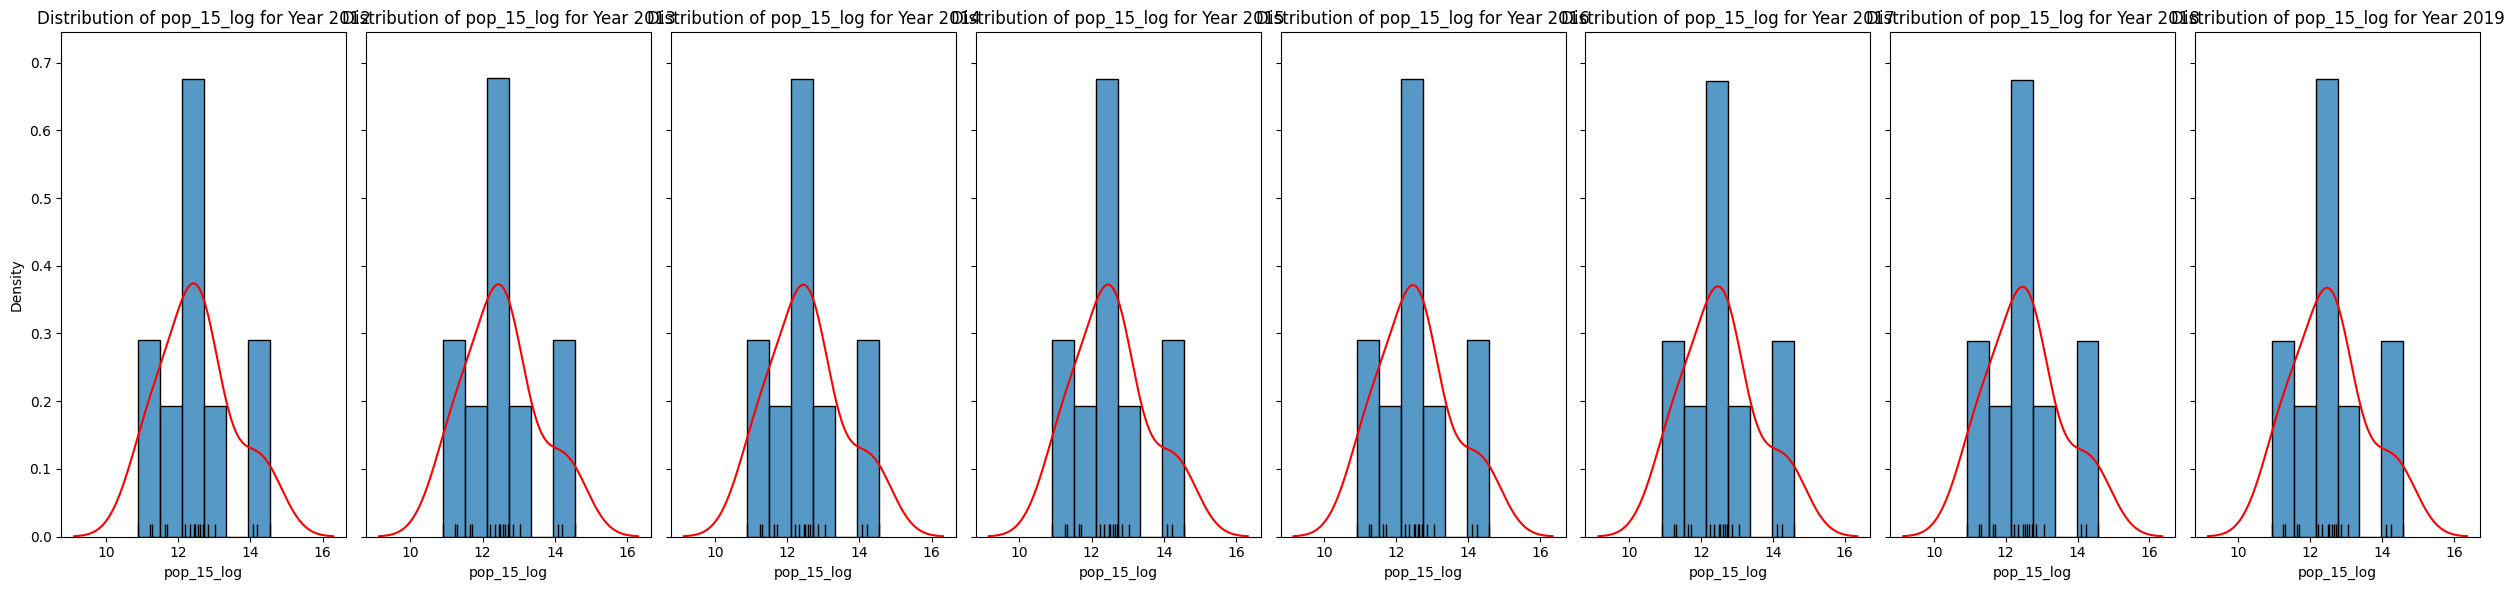

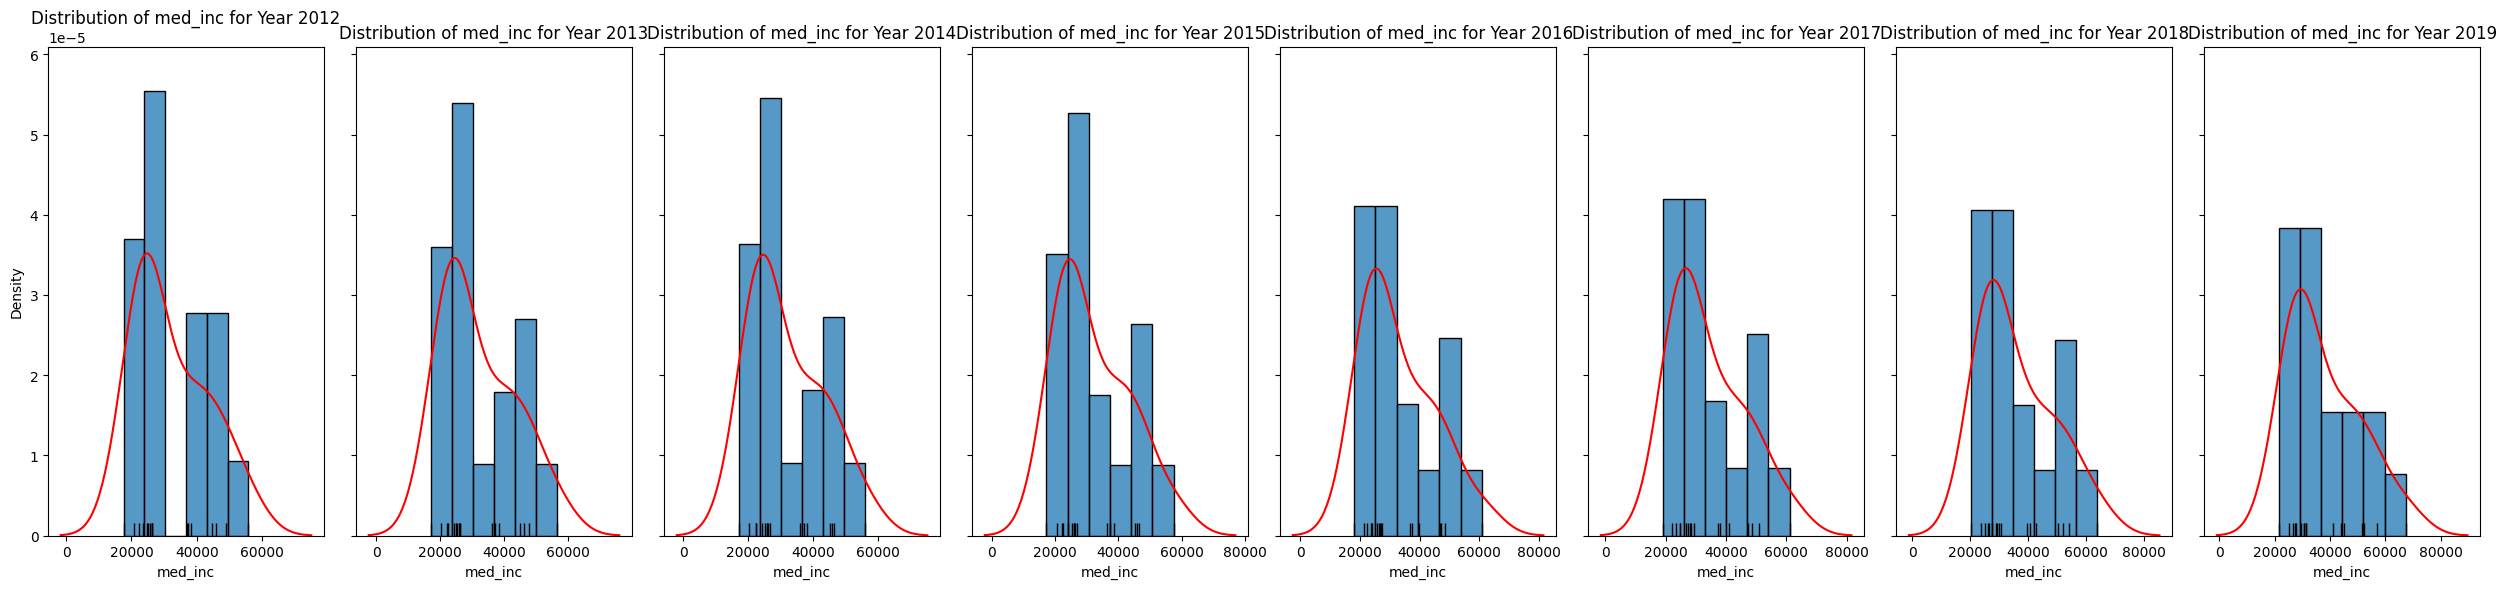

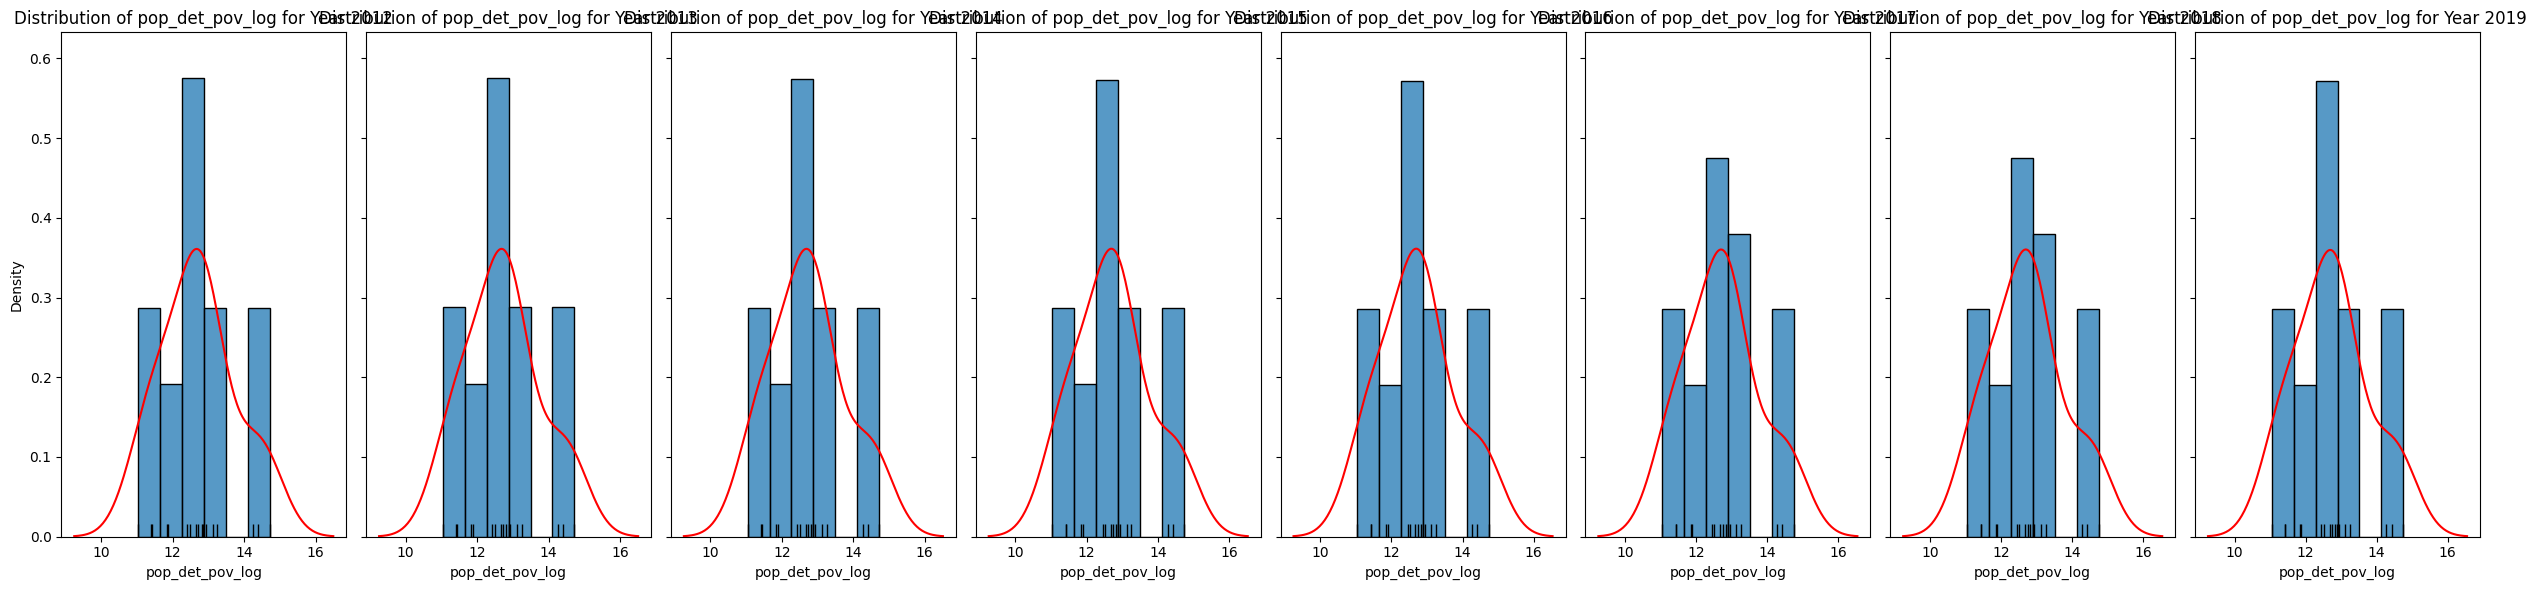

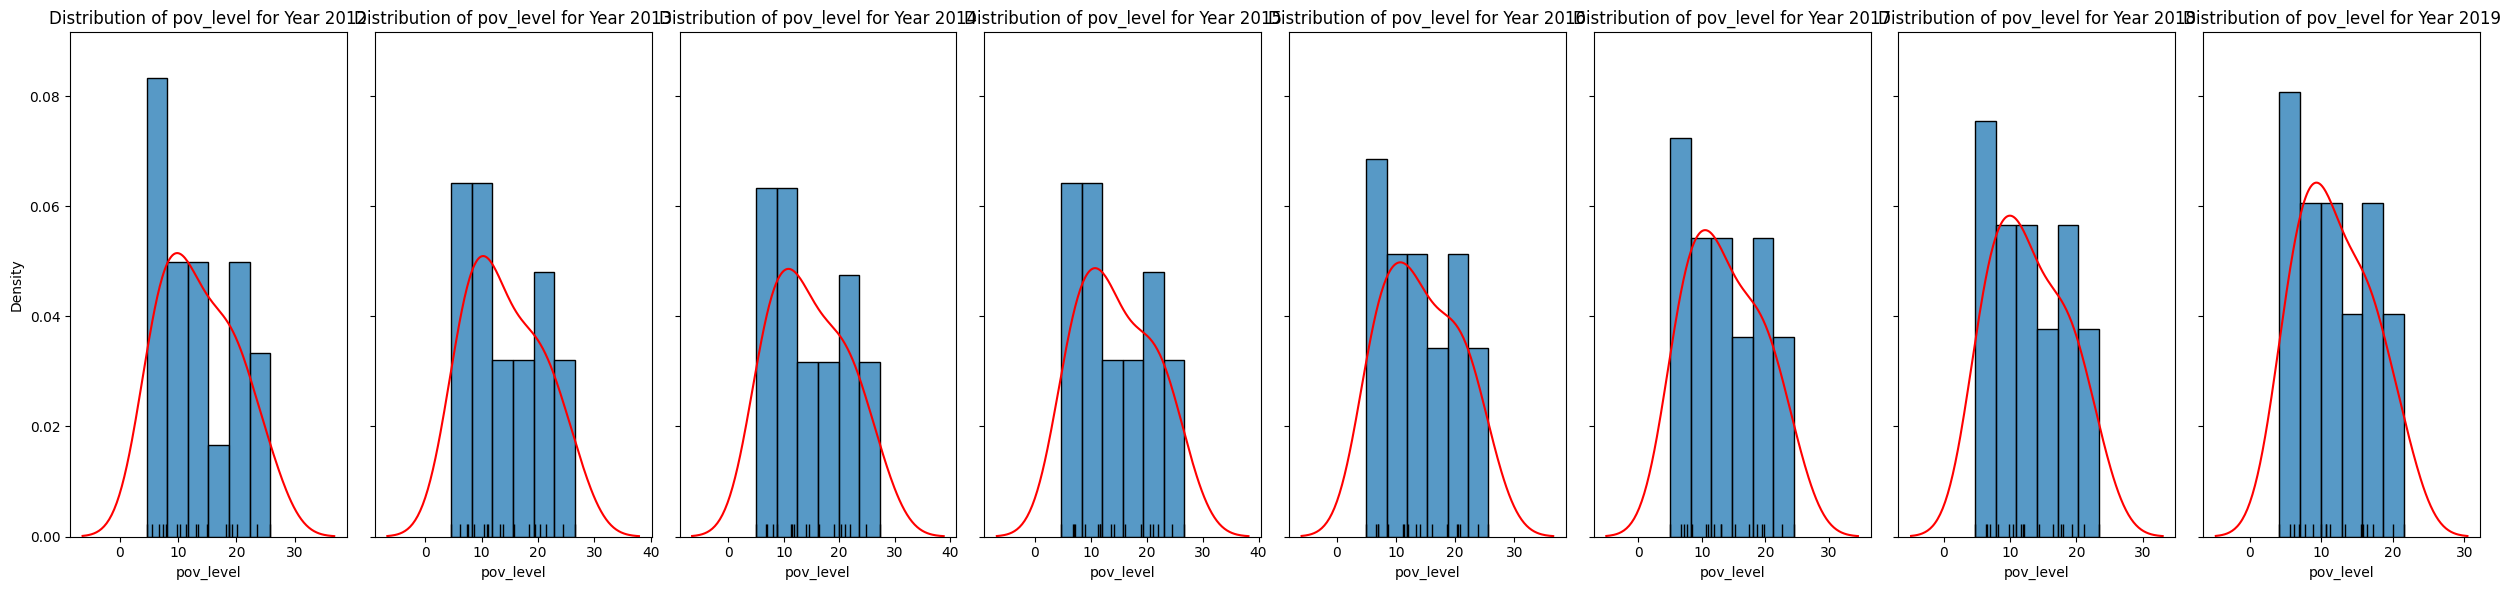

In [ ]:
columns = ['p_crash_log', 't_pop_log', 'med_age', 'hs_g', 'lhs_g', 'pop_15_log', 'med_inc', 'pop_det_pov_log', 'pov_level']

for column in columns:

    fig, axes = plt.subplots(1, 8, figsize=(25, 6), sharey=True)

    years = combined_data['Year'].unique()
    for i, year in enumerate(years):
        ax = axes[i]
        sns.histplot(combined_data[combined_data['Year'] == year][column], stat="density", ax=ax)
        sns.kdeplot(combined_data[combined_data['Year'] == year][column], color='red', ax=ax)
        sns.rugplot(combined_data[combined_data['Year'] == year][column], color='black', ax=ax)
        ax.set_title(f'Distribution of {column} for Year {year}')
        ax.set_xlabel(column)
        ax.set_ylabel('Density')

    plt.tight_layout()
    plt.show()

In [ ]:
reg1 = plm.PanelOLS.from_formula(formula = 'p_crash_log ~  t_pop_log + med_age + hs_g + lhs_g + pop_15_log + med_inc + pop_det_pov_log + pov_level + C(Year) + EntityEffects', data=combined_data, drop_absorbed=True).fit()
print(reg1)

                          PanelOLS Estimation Summary                           
Dep. Variable:            p_crash_log   R-squared:                        0.1458
Estimator:                   PanelOLS   R-squared (Between):             -13.095
No. Observations:                 136   R-squared (Within):               0.1458
Date:                Wed, Mar 13 2024   R-squared (Overall):             -12.538
Time:                        10:41:03   Log-likelihood                   -22.855
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1.1837
Entities:                          17   P-value                           0.2960
Avg Obs:                       8.0000   Distribution:                  F(15,104)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             1.1480
                            

In [ ]:
reg2 = plm.PanelOLS.from_formula(formula = 'p_crash_log ~ hs_g + med_inc + pov_level + C(Year) + EntityEffects', data=combined_data, drop_absorbed=True).fit()
print(reg2)

                          PanelOLS Estimation Summary                           
Dep. Variable:            p_crash_log   R-squared:                        0.1162
Estimator:                   PanelOLS   R-squared (Between):             -0.0839
No. Observations:                 136   R-squared (Within):               0.1162
Date:                Wed, Mar 13 2024   R-squared (Overall):             -0.0755
Time:                        10:49:20   Log-likelihood                   -25.174
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1.4330
Entities:                          17   P-value                           0.1754
Avg Obs:                       8.0000   Distribution:                  F(10,109)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             2059.5
                            

In [ ]:
reg3 = plm.PanelOLS.from_formula(formula = 'p_crash_log ~ hs_g + med_inc + C(Year) + EntityEffects', data=combined_data, drop_absorbed=True).fit()
print(reg3)

                          PanelOLS Estimation Summary                           
Dep. Variable:            p_crash_log   R-squared:                        0.0930
Estimator:                   PanelOLS   R-squared (Between):              0.1933
No. Observations:                 136   R-squared (Within):               0.0930
Date:                Wed, Mar 13 2024   R-squared (Overall):              0.1891
Time:                        10:52:47   Log-likelihood                   -26.935
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1.2534
Entities:                          17   P-value                           0.2706
Avg Obs:                       8.0000   Distribution:                   F(9,110)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             2250.0
                            